# **Data Splitting**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class config:



    data_path = '/content/drive/MyDrive/Data_3'

    path_train = "/content/drive/MyDrive/D/train"
    path_test = "/content/drive/MyDrive/D/test"

In [ ]:
import splitfolders
splitfolders.ratio(config.data_path, output="/content/drive/MyDrive/k", seed=101, ratio=(.8, .2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.33 files/s]
Copying files: 3 files [00:00,  6.83 files/s]
Copying files: 4 files [00:00,  5.05 files/s]
Copying files: 5 files [00:01,  4.67 files/s]
Copying files: 6 files [00:01,  4.79 files/s]
Copying files: 7 files [00:01,  4.48 files/s]
Copying files: 8 files [00:01,  4.70 files/s]
Copying files: 9 files [00:01,  4.10 files/s]
Copying files: 10 files [00:02,  3.76 files/s]
Copying files: 11 files [00:02,  3.95 files/s]
Copying files: 12 files [00:02,  3.96 files/s]
Copying files: 13 files [00:02,  4.27 files/s]
Copying files: 14 files [00:03,  4.22 files/s]
Copying files: 15 files [00:03,  4.42 files/s]
Copying files: 16 files [00:13,  3.19s/ files]
Copying files: 27 files [00:13,  1.77 files/s]
Copying files: 39 files [00:13,  3.96 files/s]
Copying files: 50 files [00:13,  6.70 files/s]
Copying files: 66 files [00:13, 12.07 files/s]
Copying files: 82 files [00:14, 18.97 files/s]
Copying files: 96 files [

# **EfficientNetB4**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB4, preprocess_input
IMAGE_SHAPE = (380, 380)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(380,380),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(380,380),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(380,380),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB4(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(380,380, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

71686520/71686520 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 12, 12, 1792)     17673823  
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 8965      
                                                                 
Total params: 17,682,788
Trainable params: 8,965
Non-trainable params: 17,673,823
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
for layer in model.layers:
  print(layer.trainable)


True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 103s 512ms/step - loss: 0.7982 - accuracy: 0.6925 - val_loss: 0.5686 - val_accuracy: 0.7894
Epoch 2/30
148/148 [==============================] - 71s 478ms/step - loss: 0.5246 - accuracy: 0.7969 - val_loss: 0.4942 - val_accuracy: 0.8123
Epoch 3/30
148/148 [==============================] - 72s 486ms/step - loss: 0.4622 - accuracy: 0.8164 - val_loss: 0.4729 - val_accuracy: 0.7954
Epoch 4/30
148/148 [==============================] - 73s 495ms/step - loss: 0.4244 - accuracy: 0.8364 - val_loss: 0.4379 - val_accuracy: 0.8291
Epoch 5/30
148/148 [==============================] - 73s 495ms/step - loss: 0.3985 - accuracy: 0.8438 - val_loss: 0.4358 - val_accuracy: 0.8279
Epoch 6/30
148/148 [==============================] - 74s 496ms/step - loss: 0.3797 - accuracy: 0.8512 - val_loss: 0.4391 - val_accuracy: 0.8291
Epoch 7/30
148/148 [==============================] - 74s 496ms/step - loss: 0.3600 - accuracy: 0.8588 - val_loss: 0.4308 - val_a

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 25s 438ms/step
Model Accuracy: 85.66%
                precision    recall  f1-score   support

          Mild       0.90      0.76      0.82       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.68      0.80      0.74       295
        Severe       0.79      0.75      0.77       309

      accuracy                           0.86      1388
     macro avg       0.87      0.85      0.86      1388
  weighted avg       0.86      0.86      0.86      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_reduce F

In [ ]:
print(len(model.trainable_variables))

12


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 12, 12, 1792)     17673823  
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 8965      
                                                                 
Total params: 17,682,788
Trainable params: 2,625,397
Non-trainable params: 15,057,391
_________________________________________________________________


In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40


Copying files: 371 files [49:17,  7.97s/ files]


148/148 [==============================] - 97s 532ms/step - loss: 0.4531 - accuracy: 0.8270 - val_loss: 0.4238 - val_accuracy: 0.8291
Epoch 31/40
148/148 [==============================] - 76s 509ms/step - loss: 0.2405 - accuracy: 0.9076 - val_loss: 0.4932 - val_accuracy: 0.8171
Epoch 32/40
148/148 [==============================] - 86s 580ms/step - loss: 0.1558 - accuracy: 0.9411 - val_loss: 0.5668 - val_accuracy: 0.7954
Epoch 33/40
148/148 [==============================] - 76s 516ms/step - loss: 0.1011 - accuracy: 0.9669 - val_loss: 0.6603 - val_accuracy: 0.7978
Epoch 34/40
148/148 [==============================] - 78s 523ms/step - loss: 0.0762 - accuracy: 0.9752 - val_loss: 0.6251 - val_accuracy: 0.8375
Epoch 35/40
148/148 [==============================] - 76s 515ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.5205 - val_accuracy: 0.8375
Epoch 36/40
148/148 [==============================] - 78s 523ms/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.5128 - val_accurac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 22s 427ms/step
Model Accuracy: 90.85%
                precision    recall  f1-score   support

          Mild       0.92      0.87      0.90       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.98       361
Proliferate_DR       0.90      0.75      0.82       295
        Severe       0.80      0.95      0.87       309

      accuracy                           0.91      1388
     macro avg       0.92      0.91      0.91      1388
  weighted avg       0.91      0.91      0.91      1388



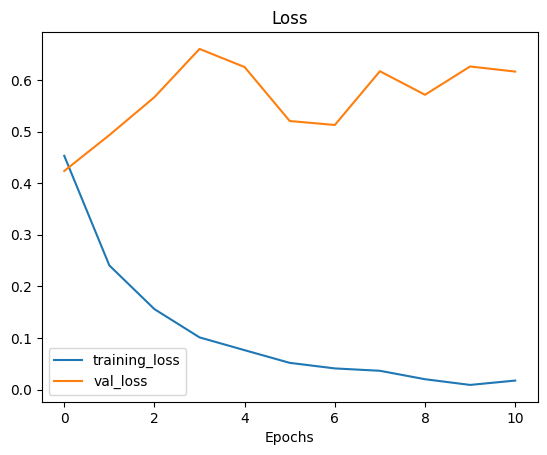

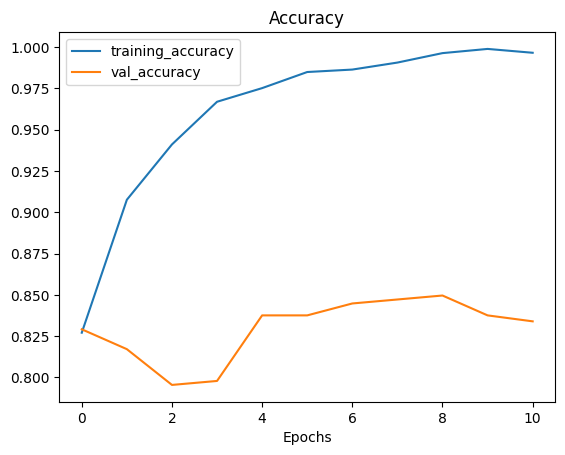

In [ ]:
plot_loss_curves(history)

# **EfficientNetB5**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB5, preprocess_input
IMAGE_SHAPE = (456,456)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(456,456),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(456,456),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(456,456),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB5(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(456,456, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

115263384/115263384 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 456, 456, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, 15, 15, 2048)     28513527  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 28,523,772
Trainable params: 10,245
Non-trainable params: 28,513,527
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
for layer in model.layers:
  print(layer.trainable)


True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 193s 1s/step - loss: 0.7986 - accuracy: 0.6844 - val_loss: 0.6097 - val_accuracy: 0.7653
Epoch 2/30
148/148 [==============================] - 143s 964ms/step - loss: 0.5372 - accuracy: 0.7861 - val_loss: 0.5244 - val_accuracy: 0.7942
Epoch 3/30
148/148 [==============================] - 143s 965ms/step - loss: 0.4707 - accuracy: 0.8139 - val_loss: 0.4893 - val_accuracy: 0.7918
Epoch 4/30
148/148 [==============================] - 143s 962ms/step - loss: 0.4409 - accuracy: 0.8207 - val_loss: 0.4820 - val_accuracy: 0.7882
Epoch 5/30
148/148 [==============================] - 143s 963ms/step - loss: 0.4055 - accuracy: 0.8396 - val_loss: 0.4546 - val_accuracy: 0.8099
Epoch 6/30
148/148 [==============================] - 144s 970ms/step - loss: 0.3912 - accuracy: 0.8415 - val_loss: 0.4417 - val_accuracy: 0.8219
Epoch 7/30
148/148 [==============================] - 143s 963ms/step - loss: 0.3744 - accuracy: 0.8514 - val_loss: 0.4302 - va

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 41s 864ms/step
Model Accuracy: 86.60%
                precision    recall  f1-score   support

          Mild       0.80      0.84      0.82       222
      Moderate       0.98      0.96      0.97       201
         No_DR       0.97      0.99      0.98       361
Proliferate_DR       0.79      0.67      0.73       295
        Severe       0.78      0.87      0.82       309

      accuracy                           0.87      1388
     macro avg       0.87      0.86      0.86      1388
  weighted avg       0.87      0.87      0.86      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block1c_dwconv False
31 block1c_bn False
32 block1c_activation False
33 block1c_se_squeeze False
34 block1c_se_reshape False
35 block1c_se_reduce False
36 block1c_se_expand False
37 block1c_se_excite False
38 block1c_project_conv False
39 block1c_project_bn False
40

In [ ]:
print(len(model.trainable_variables))

12


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 456, 456, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, 15, 15, 2048)     28513527  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 28,523,772
Trainable params: 3,426,437
Non-trainable params: 25,097,335
_________________________________________________________________


In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 190s 1s/step - loss: 0.5296 - accuracy: 0.8152 - val_loss: 0.4684 - val_accuracy: 0.8099
Epoch 31/40
148/148 [==============================] - 149s 1s/step - loss: 0.2460 - accuracy: 0.8991 - val_loss: 0.4951 - val_accuracy: 0.8303
Epoch 32/40
148/148 [==============================] - 147s 991ms/step - loss: 0.1586 - accuracy: 0.9407 - val_loss: 0.4458 - val_accuracy: 0.8375
Epoch 33/40
148/148 [==============================] - 163s 1s/step - loss: 0.0968 - accuracy: 0.9697 - val_loss: 0.5873 - val_accuracy: 0.8039
Epoch 34/40
148/148 [==============================] - 147s 991ms/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.5454 - val_accuracy: 0.8387
Epoch 35/40
148/148 [==============================] - 148s 998ms/step - loss: 0.0541 - accuracy: 0.9856 - val_loss: 0.5019 - val_accuracy: 0.8508
Epoch 36/40
148/148 [==============================] - 147s 992ms/step - loss: 0.0313 - accuracy: 0.9926 - val_loss: 0.6257 - v

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 40s 818ms/step
Model Accuracy: 88.04%
                precision    recall  f1-score   support

          Mild       0.90      0.82      0.86       222
      Moderate       0.98      0.96      0.97       201
         No_DR       0.97      0.99      0.98       361
Proliferate_DR       0.70      0.93      0.80       295
        Severe       0.94      0.69      0.80       309

      accuracy                           0.88      1388
     macro avg       0.90      0.88      0.88      1388
  weighted avg       0.90      0.88      0.88      1388



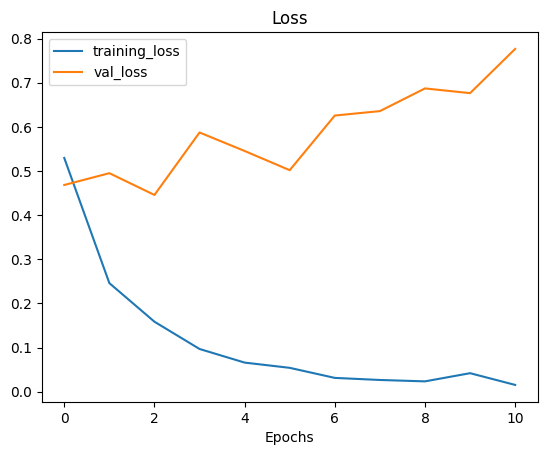

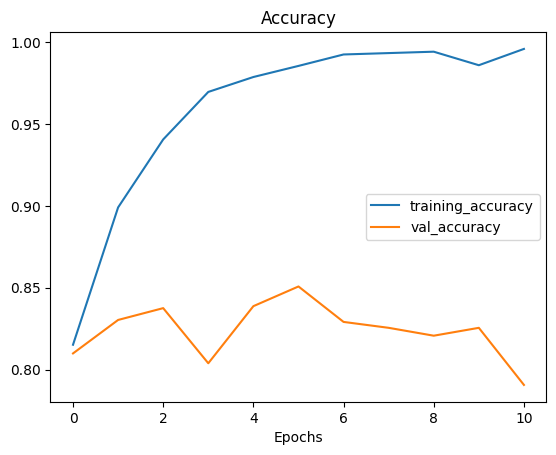

In [ ]:
plot_loss_curves(history)

# **NasNet Large**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from keras.applications.nasnet import NASNetLarge,preprocess_input
IMAGE_SHAPE = (331,331)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(331,331),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(331,331),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(331,331),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.NASNetLarge(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(331,331, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

343610240/343610240 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 331, 331, 3)]     0         
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 global_average_pooling2d_1   (None, 4032)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 20165     
                                                                 
Total params: 84,936,983
Trainable params: 20,165
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 202s 1s/step - loss: 0.7695 - accuracy: 0.6747 - val_loss: 0.6296 - val_accuracy: 0.7244
Epoch 2/30
148/148 [==============================] - 170s 1s/step - loss: 0.5454 - accuracy: 0.7770 - val_loss: 0.5628 - val_accuracy: 0.7509
Epoch 3/30
148/148 [==============================] - 169s 1s/step - loss: 0.4860 - accuracy: 0.8020 - val_loss: 0.5497 - val_accuracy: 0.7521
Epoch 4/30
148/148 [==============================] - 169s 1s/step - loss: 0.4362 - accuracy: 0.8243 - val_loss: 0.5427 - val_accuracy: 0.7593
Epoch 5/30
148/148 [==============================] - 168s 1s/step - loss: 0.4177 - accuracy: 0.8281 - val_loss: 0.5451 - val_accuracy: 0.7533
Epoch 6/30
148/148 [==============================] - 184s 1s/step - loss: 0.3848 - accuracy: 0.8468 - val_loss: 0.5107 - val_accuracy: 0.7786
Epoch 7/30
148/148 [==============================] - 169s 1s/step - loss: 0.3614 - accuracy: 0.8586 - val_loss: 0.5130 - val_accuracy: 0.7750

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 50s 1s/step
Model Accuracy: 84.37%
                precision    recall  f1-score   support

          Mild       0.83      0.77      0.80       222
      Moderate       0.97      0.95      0.96       201
         No_DR       0.98      0.98      0.98       361
Proliferate_DR       0.77      0.62      0.69       295
        Severe       0.71      0.88      0.79       309

      accuracy                           0.84      1388
     macro avg       0.85      0.84      0.84      1388
  weighted avg       0.85      0.84      0.84      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 stem_conv1 False
2 stem_bn1 False
3 activation False
4 reduction_conv_1_stem_1 False
5 reduction_bn_1_stem_1 False
6 activation_1 False
7 activation_3 False
8 separable_conv_1_pad_reduction_left1_stem_1 False
9 separable_conv_1_pad_reduction_right1_stem_1 False
10 separable_conv_1_reduction_left1_stem_1 False
11 separable_conv_1_reduction_right1_stem_1 False
12 separable_conv_1_bn_reduction_left1_stem_1 False
13 separable_conv_1_bn_reduction_right1_stem_1 False
14 activation_2 False
15 activation_4 False
16 separable_conv_2_reduction_left1_stem_1 False
17 separable_conv_2_reduction_right1_stem_1 False
18 activation_5 False
19 separable_conv_2_bn_reduction_left1_stem_1 False
20 separable_conv_2_bn_reduction_right1_stem_1 False
21 separable_conv_1_pad_reduction_right2_stem_1 False
22 activation_7 False
23 reduction_add_1_stem_1 False
24 separable_conv_1_reduction_right2_stem_1 False
25 separable_conv_1_pad_reduction_right3_stem_1 False
26 activation_9 False
27 separable

In [ ]:
print(len(model.trainable_variables))
model.summary()

4
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 331, 331, 3)]     0         
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 global_average_pooling2d_1   (None, 4032)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 20165     
                                                                 
Total params: 84,936,983
Trainable params: 21,509
Non-trainable params: 84,915,474
_________________________________________________________________


In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 197s 1s/step - loss: 0.1763 - accuracy: 0.9491 - val_loss: 0.5433 - val_accuracy: 0.7822
Epoch 31/40
148/148 [==============================] - 169s 1s/step - loss: 0.1684 - accuracy: 0.9532 - val_loss: 0.5421 - val_accuracy: 0.7774
Epoch 32/40
148/148 [==============================] - 174s 1s/step - loss: 0.1590 - accuracy: 0.9612 - val_loss: 0.5353 - val_accuracy: 0.7906
Epoch 33/40
148/148 [==============================] - 185s 1s/step - loss: 0.1581 - accuracy: 0.9563 - val_loss: 0.5293 - val_accuracy: 0.7894
Epoch 34/40
148/148 [==============================] - 169s 1s/step - loss: 0.1505 - accuracy: 0.9633 - val_loss: 0.5306 - val_accuracy: 0.7834
Epoch 35/40
148/148 [==============================] - 190s 1s/step - loss: 0.1457 - accuracy: 0.9623 - val_loss: 0.5318 - val_accuracy: 0.7954
Epoch 36/40
148/148 [==============================] - 169s 1s/step - loss: 0.1435 - accuracy: 0.9671 - val_loss: 0.5387 - val_accuracy:

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 49s 985ms/step
Model Accuracy: 84.94%
                precision    recall  f1-score   support

          Mild       0.81      0.82      0.81       222
      Moderate       0.97      0.94      0.95       201
         No_DR       0.97      0.99      0.98       361
Proliferate_DR       0.74      0.68      0.71       295
        Severe       0.76      0.82      0.79       309

      accuracy                           0.85      1388
     macro avg       0.85      0.85      0.85      1388
  weighted avg       0.85      0.85      0.85      1388



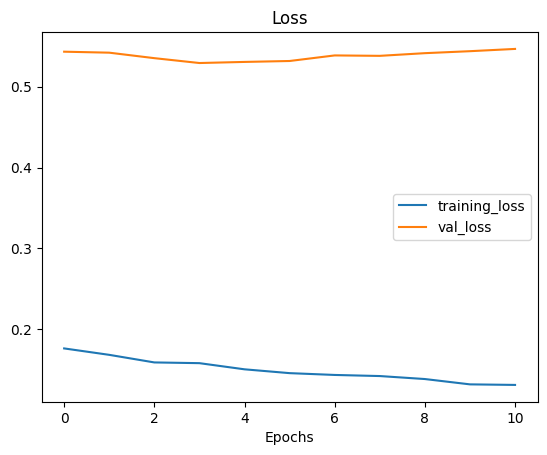

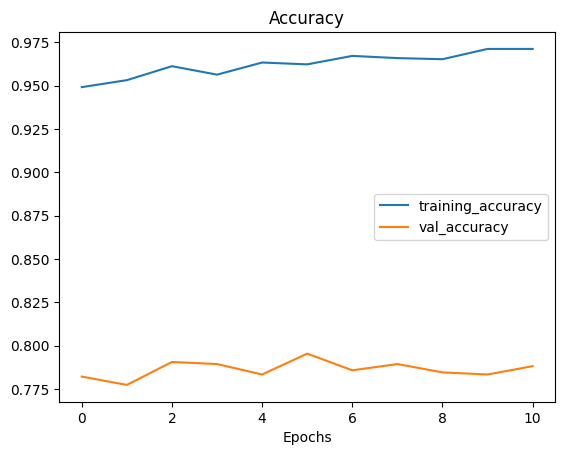

In [ ]:
plot_loss_curves(history)

# **DenseNet169**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from keras.applications.densenet import DenseNet169,preprocess_input
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.DenseNet169(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

51877672/51877672 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d_2   (None, 1664)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 8325      
                                                                 
Total params: 12,651,205
Trainable params: 8,325
Non-trainable params: 12,642,880
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 46s 225ms/step - loss: 0.9036 - accuracy: 0.6159 - val_loss: 0.6305 - val_accuracy: 0.7389
Epoch 2/30
148/148 [==============================] - 26s 174ms/step - loss: 0.5487 - accuracy: 0.7755 - val_loss: 0.5357 - val_accuracy: 0.7834
Epoch 3/30
148/148 [==============================] - 26s 178ms/step - loss: 0.4734 - accuracy: 0.8044 - val_loss: 0.5077 - val_accuracy: 0.7942
Epoch 4/30
148/148 [==============================] - 25s 168ms/step - loss: 0.4375 - accuracy: 0.8173 - val_loss: 0.4688 - val_accuracy: 0.8171
Epoch 5/30
148/148 [==============================] - 25s 171ms/step - loss: 0.4094 - accuracy: 0.8340 - val_loss: 0.4719 - val_accuracy: 0.7978
Epoch 6/30
148/148 [==============================] - 25s 172ms/step - loss: 0.3811 - accuracy: 0.8478 - val_loss: 0.4570 - val_accuracy: 0.8123
Epoch 7/30
148/148 [==============================] - 26s 172ms/step - loss: 0.3649 - accuracy: 0.8535 - val_loss: 0.4645 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 11s 205ms/step
Model Accuracy: 84.01%
                precision    recall  f1-score   support

          Mild       0.83      0.84      0.83       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.98       361
Proliferate_DR       0.70      0.64      0.67       295
        Severe       0.73      0.77      0.75       309

      accuracy                           0.84      1388
     macro avg       0.84      0.84      0.84      1388
  weighted avg       0.84      0.84      0.84      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 zero_padding2d_4 False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_5 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv False
17 conv2_block2_1_bn False
18 conv2_block2_1_relu False
19 conv2_block2_2_conv False
20 conv2_block2_concat False
21 conv2_block3_0_bn False
22 conv2_block3_0_relu False
23 conv2_block3_1_conv False
24 conv2_block3_1_bn False
25 conv2_block3_1_relu False
26 conv2_block3_2_conv False
27 conv2_block3_concat False
28 conv2_block4_0_bn False
29 conv2_block4_0_relu False
30 conv2_block4_1_conv False
31 conv2_block4_1_bn False
32 conv2_block4_1_relu False
33 conv2_block4_2_conv False
34 conv2_block4_concat False
35 conv2_block5_0_bn False
36 conv2_block5_0_relu False
37 conv2_block5_

In [ ]:
print(len(model.trainable_variables))
model.summary()

10
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d_2   (None, 1664)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 8325      
                                                                 
Total params: 12,651,205
Trainable params: 260,933
Non-trainable params: 12,390,272
_________________________________________________________________


In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 43s 215ms/step - loss: 0.2784 - accuracy: 0.8964 - val_loss: 0.4303 - val_accuracy: 0.8387
Epoch 31/40
148/148 [==============================] - 26s 176ms/step - loss: 0.2318 - accuracy: 0.9116 - val_loss: 0.4459 - val_accuracy: 0.8243
Epoch 32/40
148/148 [==============================] - 25s 170ms/step - loss: 0.2308 - accuracy: 0.9099 - val_loss: 0.4371 - val_accuracy: 0.8375
Epoch 33/40
148/148 [==============================] - 26s 174ms/step - loss: 0.2250 - accuracy: 0.9165 - val_loss: 0.4531 - val_accuracy: 0.8147
Epoch 34/40
148/148 [==============================] - 25s 170ms/step - loss: 0.2222 - accuracy: 0.9173 - val_loss: 0.4338 - val_accuracy: 0.8315
Epoch 35/40
148/148 [==============================] - 25s 168ms/step - loss: 0.2144 - accuracy: 0.9207 - val_loss: 0.4411 - val_accuracy: 0.8231
Epoch 36/40
148/148 [==============================] - 26s 178ms/step - loss: 0.2092 - accuracy: 0.9205 - val_loss: 0.4458 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 10s 169ms/step
Model Accuracy: 84.58%
                precision    recall  f1-score   support

          Mild       0.75      0.93      0.83       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.73      0.63      0.68       295
        Severe       0.78      0.74      0.76       309

      accuracy                           0.85      1388
     macro avg       0.84      0.85      0.85      1388
  weighted avg       0.85      0.85      0.84      1388



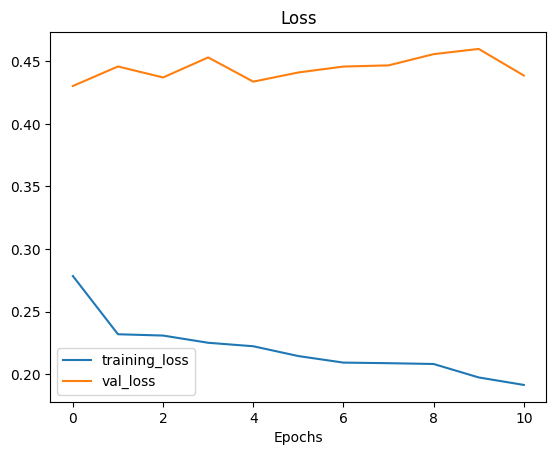

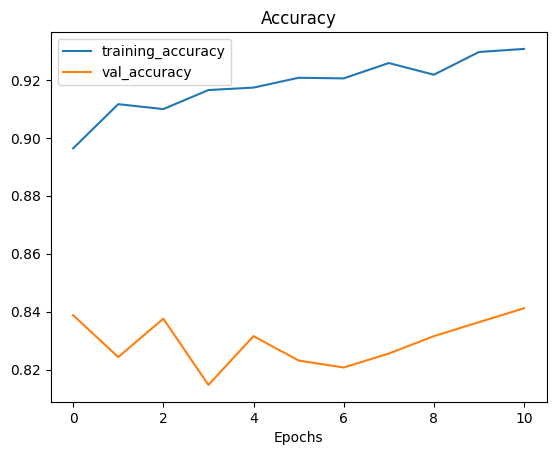

In [ ]:
plot_loss_curves(history)

# **EfficientNetB6**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB6, preprocess_input
IMAGE_SHAPE = (528, 528)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(528,528),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(528,528),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(528,528),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB6(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(528,528, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

165234480/165234480 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 528, 528, 3)]     0         
                                                                 
 efficientnetb6 (Functional)  (None, 17, 17, 2304)     40960143  
                                                                 
 global_average_pooling2d_1   (None, 2304)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 11525     
                                                                 
Total params: 40,971,668
Trainable params: 11,525
Non-trainable params: 40,960,143
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)


True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 318s 2s/step - loss: 0.8305 - accuracy: 0.6831 - val_loss: 0.6180 - val_accuracy: 0.7653
Epoch 2/30
148/148 [==============================] - 269s 2s/step - loss: 0.5472 - accuracy: 0.7902 - val_loss: 0.5339 - val_accuracy: 0.7858
Epoch 3/30
148/148 [==============================] - 273s 2s/step - loss: 0.4876 - accuracy: 0.8020 - val_loss: 0.5135 - val_accuracy: 0.8014
Epoch 4/30
148/148 [==============================] - 271s 2s/step - loss: 0.4431 - accuracy: 0.8245 - val_loss: 0.4901 - val_accuracy: 0.8026
Epoch 5/30
148/148 [==============================] - 270s 2s/step - loss: 0.4218 - accuracy: 0.8343 - val_loss: 0.4674 - val_accuracy: 0.8123
Epoch 6/30
148/148 [==============================] - 269s 2s/step - loss: 0.3992 - accuracy: 0.8463 - val_loss: 0.4592 - val_accuracy: 0.8183
Epoch 7/30
148/148 [==============================] - 270s 2s/step - loss: 0.3845 - accuracy: 0.8501 - val_loss: 0.4423 - val_accuracy: 0.8195

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 74s 2s/step
Model Accuracy: 85.52%
                precision    recall  f1-score   support

          Mild       0.82      0.84      0.83       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.79      0.59      0.68       295
        Severe       0.72      0.88      0.79       309

      accuracy                           0.86      1388
     macro avg       0.86      0.86      0.85      1388
  weighted avg       0.86      0.86      0.85      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block1c_dwconv False
31 block1c_bn False
32 block1c_activation False
33 block1c_se_squeeze False
34 block1c_se_reshape False
35 block1c_se_reduce False
36 block1c_se_expand False
37 block1c_se_excite False
38 block1c_project_conv False
39 block1c_project_bn Fals

In [ ]:
print(len(model.trainable_variables))
model.summary()

12
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 528, 528, 3)]     0         
                                                                 
 efficientnetb6 (Functional)  (None, 17, 17, 2304)     40960143  
                                                                 
 global_average_pooling2d_1   (None, 2304)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 11525     
                                                                 
Total params: 40,971,668
Trainable params: 4,333,973
Non-trainable params: 36,637,695
_________________________________________________________________


In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 306s 2s/step - loss: 0.5075 - accuracy: 0.8171 - val_loss: 0.4961 - val_accuracy: 0.7966
Epoch 31/40
148/148 [==============================] - 280s 2s/step - loss: 0.2934 - accuracy: 0.8841 - val_loss: 0.4585 - val_accuracy: 0.8315
Epoch 32/40
148/148 [==============================] - 278s 2s/step - loss: 0.2214 - accuracy: 0.9120 - val_loss: 0.4863 - val_accuracy: 0.7918
Epoch 33/40
148/148 [==============================] - 279s 2s/step - loss: 0.1520 - accuracy: 0.9457 - val_loss: 0.5506 - val_accuracy: 0.8099
Epoch 34/40
148/148 [==============================] - 280s 2s/step - loss: 0.1270 - accuracy: 0.9546 - val_loss: 0.5808 - val_accuracy: 0.8327
Epoch 35/40
148/148 [==============================] - 277s 2s/step - loss: 0.0805 - accuracy: 0.9731 - val_loss: 0.5388 - val_accuracy: 0.8303
Epoch 36/40
148/148 [==============================] - 278s 2s/step - loss: 0.0670 - accuracy: 0.9807 - val_loss: 0.6532 - val_accuracy:

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 73s 2s/step
Model Accuracy: 92.29%
                precision    recall  f1-score   support

          Mild       0.94      0.86      0.90       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.84      0.85      0.84       295
        Severe       0.88      0.92      0.90       309

      accuracy                           0.92      1388
     macro avg       0.93      0.92      0.92      1388
  weighted avg       0.92      0.92      0.92      1388



In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

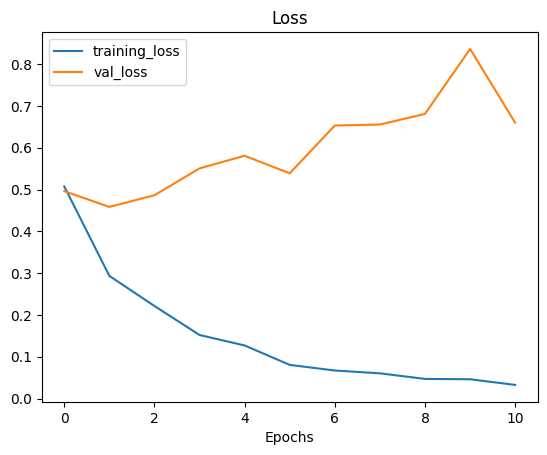

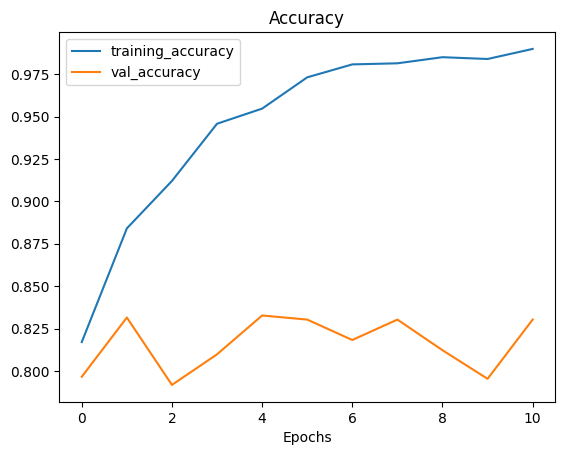

In [ ]:
plot_loss_curves(history)

# **EfficientNetB7**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
IMAGE_SHAPE = (600, 600)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(600,600),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(600,600),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(600,600),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB7(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(600,600, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 19, 19, 2560)     64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 12805     
                                                                 
Total params: 64,110,492
Trainable params: 12,805
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 808s 5s/step - loss: 0.7355 - accuracy: 0.6990 - val_loss: 0.5194 - val_accuracy: 0.8039
Epoch 2/30
148/148 [==============================] - 448s 3s/step - loss: 0.4933 - accuracy: 0.8006 - val_loss: 0.4673 - val_accuracy: 0.8123
Epoch 3/30
148/148 [==============================] - 466s 3s/step - loss: 0.4437 - accuracy: 0.8150 - val_loss: 0.4477 - val_accuracy: 0.8255
Epoch 4/30
148/148 [==============================] - 450s 3s/step - loss: 0.4170 - accuracy: 0.8323 - val_loss: 0.4524 - val_accuracy: 0.8195
Epoch 5/30
148/148 [==============================] - 450s 3s/step - loss: 0.3918 - accuracy: 0.8359 - val_loss: 0.4412 - val_accuracy: 0.8243
Epoch 6/30
148/148 [==============================] - 451s 3s/step - loss: 0.3725 - accuracy: 0.8487 - val_loss: 0.4250 - val_accuracy: 0.8375
Epoch 7/30
148/148 [==============================] - 451s 3s/step - loss: 0.3568 - accuracy: 0.8576 - val_loss: 0.4337 - val_accuracy: 0.8351

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 294s 7s/step
Model Accuracy: 86.67%
                precision    recall  f1-score   support

          Mild       0.84      0.90      0.87       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.82      0.61      0.70       295
        Severe       0.73      0.87      0.79       309

      accuracy                           0.87      1388
     macro avg       0.87      0.87      0.87      1388
  weighted avg       0.87      0.87      0.86      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block1c_dwconv False
31 block1c_bn False
32 block1c_activation False
33 block1c_se_squeeze False
34 block1c_se_reshape False
35 block1c_se_reduce False
36 block1c_se_expand False
37 block1c_se_excite False
38 block1c_project_conv False
39 block1c_project_bn False
40

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 507s 3s/step - loss: 0.6485 - accuracy: 0.7982 - val_loss: 0.5913 - val_accuracy: 0.8051
Epoch 31/40
148/148 [==============================] - 465s 3s/step - loss: 0.2906 - accuracy: 0.8826 - val_loss: 0.4730 - val_accuracy: 0.8171
Epoch 32/40
148/148 [==============================] - 480s 3s/step - loss: 0.1917 - accuracy: 0.9224 - val_loss: 0.4762 - val_accuracy: 0.8291
Epoch 33/40
148/148 [==============================] - 461s 3s/step - loss: 0.1262 - accuracy: 0.9557 - val_loss: 0.4971 - val_accuracy: 0.8231
Epoch 34/40
148/148 [==============================] - 462s 3s/step - loss: 0.1009 - accuracy: 0.9650 - val_loss: 0.5777 - val_accuracy: 0.8195
Epoch 35/40
148/148 [==============================] - 480s 3s/step - loss: 0.0950 - accuracy: 0.9669 - val_loss: 0.6658 - val_accuracy: 0.8315
Epoch 36/40
148/148 [==============================] - 463s 3s/step - loss: 0.0548 - accuracy: 0.9837 - val_loss: 0.6813 - val_accuracy:

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 118s 3s/step
Model Accuracy: 92.51%
                precision    recall  f1-score   support

          Mild       0.92      0.93      0.92       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.93      0.77      0.84       295
        Severe       0.83      0.96      0.89       309

      accuracy                           0.93      1388
     macro avg       0.93      0.93      0.92      1388
  weighted avg       0.93      0.93      0.92      1388



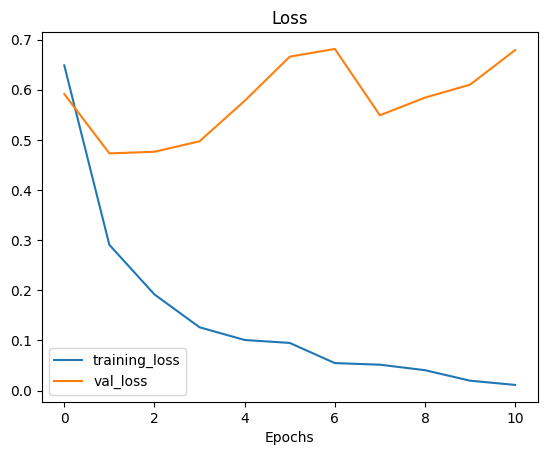

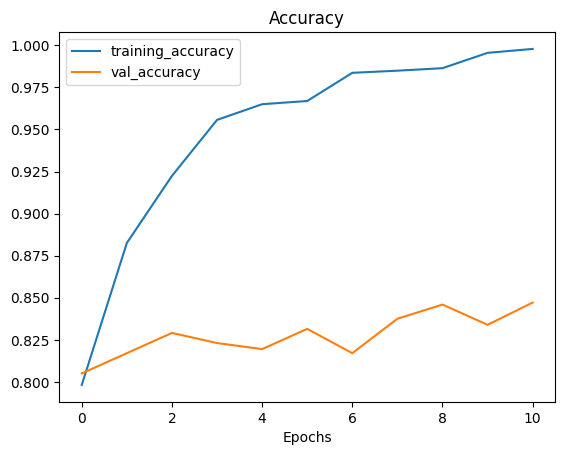

In [ ]:
plot_loss_curves(history)

# **EfficientNetB3**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input
IMAGE_SHAPE = (300, 300)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(300,300),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(300,300),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(300,300),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB3(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(300,300, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

43941136/43941136 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 10, 10, 1536)     10783535  
                                                                 
 global_average_pooling2d_2   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 7685      
                                                                 
Total params: 10,791,220
Trainable params: 7,685
Non-trainable params: 10,783,535
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 60s 300ms/step - loss: 0.7922 - accuracy: 0.6916 - val_loss: 0.5810 - val_accuracy: 0.7557
Epoch 2/30
148/148 [==============================] - 42s 284ms/step - loss: 0.5228 - accuracy: 0.7948 - val_loss: 0.5128 - val_accuracy: 0.7918
Epoch 3/30
148/148 [==============================] - 38s 253ms/step - loss: 0.4582 - accuracy: 0.8186 - val_loss: 0.4986 - val_accuracy: 0.8063
Epoch 4/30
148/148 [==============================] - 40s 267ms/step - loss: 0.4167 - accuracy: 0.8351 - val_loss: 0.4699 - val_accuracy: 0.8039
Epoch 5/30
148/148 [==============================] - 38s 256ms/step - loss: 0.3935 - accuracy: 0.8472 - val_loss: 0.4669 - val_accuracy: 0.8026
Epoch 6/30
148/148 [==============================] - 40s 266ms/step - loss: 0.3711 - accuracy: 0.8567 - val_loss: 0.4878 - val_accuracy: 0.7942
Epoch 7/30
148/148 [==============================] - 39s 265ms/step - loss: 0.3554 - accuracy: 0.8648 - val_loss: 0.4685 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 13s 251ms/step
Model Accuracy: 88.40%
                precision    recall  f1-score   support

          Mild       0.89      0.79      0.84       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.74      0.86      0.80       295
        Severe       0.85      0.80      0.82       309

      accuracy                           0.88      1388
     macro avg       0.89      0.88      0.88      1388
  weighted avg       0.89      0.88      0.88      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_5 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_redu

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 56s 288ms/step - loss: 0.4762 - accuracy: 0.8249 - val_loss: 0.5353 - val_accuracy: 0.8075
Epoch 31/40
148/148 [==============================] - 39s 261ms/step - loss: 0.2269 - accuracy: 0.9120 - val_loss: 0.5746 - val_accuracy: 0.8014
Epoch 32/40
148/148 [==============================] - 40s 268ms/step - loss: 0.1644 - accuracy: 0.9381 - val_loss: 0.5890 - val_accuracy: 0.8147
Epoch 33/40
148/148 [==============================] - 39s 262ms/step - loss: 0.1129 - accuracy: 0.9604 - val_loss: 0.5794 - val_accuracy: 0.8002
Epoch 34/40
148/148 [==============================] - 39s 260ms/step - loss: 0.0789 - accuracy: 0.9746 - val_loss: 0.5960 - val_accuracy: 0.8063
Epoch 35/40
148/148 [==============================] - 45s 301ms/step - loss: 0.0497 - accuracy: 0.9858 - val_loss: 0.6676 - val_accuracy: 0.8255
Epoch 36/40
148/148 [==============================] - 43s 293ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.6770 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 14s 222ms/step
Model Accuracy: 90.49%
                precision    recall  f1-score   support

          Mild       0.82      0.93      0.88       222
      Moderate       0.98      0.99      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.93      0.67      0.78       295
        Severe       0.82      0.95      0.88       309

      accuracy                           0.90      1388
     macro avg       0.91      0.91      0.90      1388
  weighted avg       0.91      0.90      0.90      1388



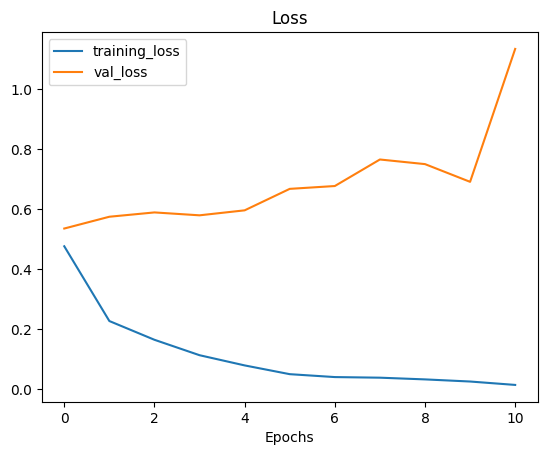

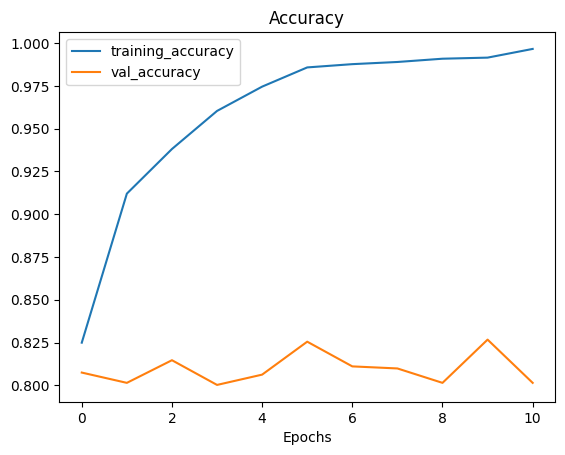

In [ ]:
plot_loss_curves(history)

# **EfficinetNetB2**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2, preprocess_input
IMAGE_SHAPE = (260, 260)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260,260),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(260,260),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(260,260),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB2(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(260,260, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

31790344/31790344 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 9, 9, 1408)       7768569   
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 7045      
                                                                 
Total params: 7,775,614
Trainable params: 7,045
Non-trainable params: 7,768,569
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 48s 188ms/step - loss: 0.8129 - accuracy: 0.6685 - val_loss: 0.6061 - val_accuracy: 0.7690
Epoch 2/30
148/148 [==============================] - 24s 159ms/step - loss: 0.5353 - accuracy: 0.7897 - val_loss: 0.5151 - val_accuracy: 0.8123
Epoch 3/30
148/148 [==============================] - 25s 166ms/step - loss: 0.4695 - accuracy: 0.8143 - val_loss: 0.4922 - val_accuracy: 0.8039
Epoch 4/30
148/148 [==============================] - 24s 161ms/step - loss: 0.4366 - accuracy: 0.8239 - val_loss: 0.4769 - val_accuracy: 0.8051
Epoch 5/30
148/148 [==============================] - 26s 174ms/step - loss: 0.4077 - accuracy: 0.8330 - val_loss: 0.4744 - val_accuracy: 0.8026
Epoch 6/30
148/148 [==============================] - 25s 166ms/step - loss: 0.3872 - accuracy: 0.8485 - val_loss: 0.4583 - val_accuracy: 0.8135
Epoch 7/30
148/148 [==============================] - 26s 174ms/step - loss: 0.3697 - accuracy: 0.8538 - val_loss: 0.4605 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 8s 147ms/step
Model Accuracy: 86.60%
                precision    recall  f1-score   support

          Mild       0.83      0.83      0.83       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.98      0.99      0.99       361
Proliferate_DR       0.75      0.74      0.74       295
        Severe       0.79      0.79      0.79       309

      accuracy                           0.87      1388
     macro avg       0.87      0.87      0.87      1388
  weighted avg       0.87      0.87      0.87      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_reduce F

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 40s 187ms/step - loss: 0.4780 - accuracy: 0.8164 - val_loss: 0.5435 - val_accuracy: 0.7942
Epoch 31/40
148/148 [==============================] - 26s 178ms/step - loss: 0.2435 - accuracy: 0.9057 - val_loss: 0.5346 - val_accuracy: 0.8171
Epoch 32/40
148/148 [==============================] - 26s 173ms/step - loss: 0.1766 - accuracy: 0.9330 - val_loss: 0.5174 - val_accuracy: 0.8195
Epoch 33/40
148/148 [==============================] - 28s 192ms/step - loss: 0.1281 - accuracy: 0.9616 - val_loss: 0.6035 - val_accuracy: 0.8255
Epoch 34/40
148/148 [==============================] - 25s 168ms/step - loss: 0.0825 - accuracy: 0.9729 - val_loss: 0.6570 - val_accuracy: 0.8135
Epoch 35/40
148/148 [==============================] - 26s 175ms/step - loss: 0.0692 - accuracy: 0.9775 - val_loss: 0.6667 - val_accuracy: 0.8135
Epoch 36/40
148/148 [==============================] - 26s 173ms/step - loss: 0.0411 - accuracy: 0.9896 - val_loss: 0.6901 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 9s 134ms/step
Model Accuracy: 90.35%
                precision    recall  f1-score   support

          Mild       0.90      0.87      0.89       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.90      0.73      0.81       295
        Severe       0.79      0.95      0.86       309

      accuracy                           0.90      1388
     macro avg       0.91      0.90      0.90      1388
  weighted avg       0.91      0.90      0.90      1388



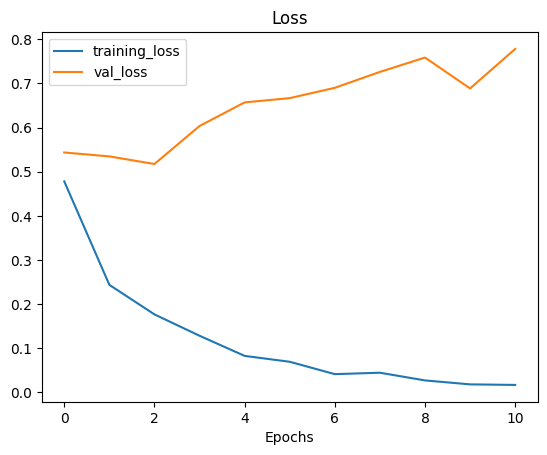

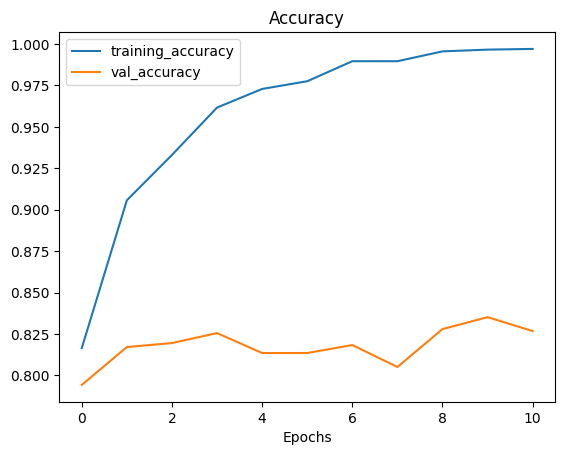

In [ ]:
plot_loss_curves(history)

# **EfficientNetB1**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input
IMAGE_SHAPE = (240, 240)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(240,240),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(240,240),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(240,240),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB1(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(240,240, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, 8, 8, 1280)       6575239   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 6,581,644
Trainable params: 6,405
Non-trainable params: 6,575,239
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 39s 177ms/step - loss: 0.7576 - accuracy: 0.6908 - val_loss: 0.5643 - val_accuracy: 0.7762
Epoch 2/30
148/148 [==============================] - 22s 148ms/step - loss: 0.5079 - accuracy: 0.7936 - val_loss: 0.5056 - val_accuracy: 0.8099
Epoch 3/30
148/148 [==============================] - 22s 150ms/step - loss: 0.4528 - accuracy: 0.8122 - val_loss: 0.4834 - val_accuracy: 0.8135
Epoch 4/30
148/148 [==============================] - 21s 145ms/step - loss: 0.4218 - accuracy: 0.8245 - val_loss: 0.4759 - val_accuracy: 0.8051
Epoch 5/30
148/148 [==============================] - 24s 162ms/step - loss: 0.3952 - accuracy: 0.8381 - val_loss: 0.4521 - val_accuracy: 0.8267
Epoch 6/30
148/148 [==============================] - 24s 160ms/step - loss: 0.3771 - accuracy: 0.8463 - val_loss: 0.4547 - val_accuracy: 0.8267
Epoch 7/30
148/148 [==============================] - 23s 153ms/step - loss: 0.3606 - accuracy: 0.8574 - val_loss: 0.4535 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 9s 151ms/step
Model Accuracy: 84.94%
                precision    recall  f1-score   support

          Mild       0.90      0.73      0.81       222
      Moderate       0.97      0.98      0.98       201
         No_DR       0.99      0.98      0.99       361
Proliferate_DR       0.67      0.80      0.73       295
        Severe       0.78      0.74      0.76       309

      accuracy                           0.85      1388
     macro avg       0.86      0.85      0.85      1388
  weighted avg       0.86      0.85      0.85      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_reduce F

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 37s 171ms/step - loss: 0.4500 - accuracy: 0.8201 - val_loss: 0.4867 - val_accuracy: 0.7978
Epoch 31/40
148/148 [==============================] - 23s 154ms/step - loss: 0.2232 - accuracy: 0.9171 - val_loss: 0.5306 - val_accuracy: 0.8111
Epoch 32/40
148/148 [==============================] - 24s 164ms/step - loss: 0.1444 - accuracy: 0.9472 - val_loss: 0.5534 - val_accuracy: 0.8231
Epoch 33/40
148/148 [==============================] - 22s 146ms/step - loss: 0.1047 - accuracy: 0.9663 - val_loss: 0.6460 - val_accuracy: 0.8002
Epoch 34/40
148/148 [==============================] - 22s 146ms/step - loss: 0.0657 - accuracy: 0.9826 - val_loss: 0.5955 - val_accuracy: 0.8135
Epoch 35/40
148/148 [==============================] - 23s 156ms/step - loss: 0.0487 - accuracy: 0.9873 - val_loss: 0.6155 - val_accuracy: 0.8195
Epoch 36/40
148/148 [==============================] - 23s 155ms/step - loss: 0.0389 - accuracy: 0.9909 - val_loss: 0.6109 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 8s 122ms/step
Model Accuracy: 92.07%
                precision    recall  f1-score   support

          Mild       0.92      0.86      0.89       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.98       361
Proliferate_DR       0.87      0.84      0.85       295
        Severe       0.86      0.93      0.90       309

      accuracy                           0.92      1388
     macro avg       0.92      0.92      0.92      1388
  weighted avg       0.92      0.92      0.92      1388



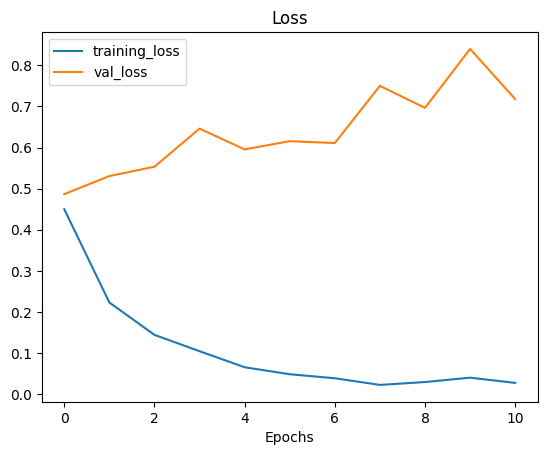

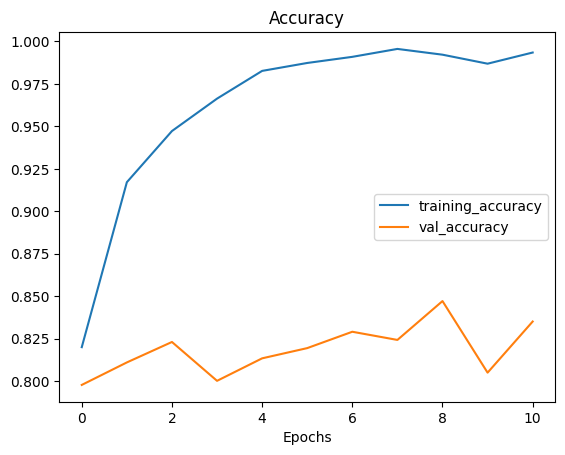

In [ ]:
plot_loss_curves(history)

# **EfficientNetB0**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, loss, label='training_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/D/train"
test_dir = "/content/drive/MyDrive/D/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4725 images belonging to 5 classes.
Found 832 images belonging to 5 classes.
Found 1390 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
model = EfficientNetB0()
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetB0(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
128/148 [========================>.....] - ETA: 1:26 - loss: 0.6789 - accuracy: 0.7368

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

In [ ]:
plot_loss_curves(history)

In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 50
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

In [ ]:
import cv2
import io
import ipywidgets as widgets
from PIL import Image

In [ ]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
#load saved model

#img_path = '/content/000c1434d8d7.png'
#img_path = '/content/0e94cd271c00.png'
img_path = '/content/diaretdb1_image003.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ['Mild','Moderate','No_DR','Proliferate_DR','Severe']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, pred_classes)
print(cm)

In [ ]:
plot_loss_curves(history)

# **MobileNetV3Small**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Small, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.MobileNetV3Small(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 2885      
                                                                 
Total params: 942,005
Trainable params: 2,885
Non-trainable params: 939,120
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 27s 157ms/step - loss: 1.0494 - accuracy: 0.5930 - val_loss: 0.7291 - val_accuracy: 0.7641
Epoch 2/30
148/148 [==============================] - 18s 124ms/step - loss: 0.6445 - accuracy: 0.7601 - val_loss: 0.5802 - val_accuracy: 0.7834
Epoch 3/30
148/148 [==============================] - 19s 127ms/step - loss: 0.5510 - accuracy: 0.7861 - val_loss: 0.5307 - val_accuracy: 0.7978
Epoch 4/30
148/148 [==============================] - 18s 125ms/step - loss: 0.5053 - accuracy: 0.8061 - val_loss: 0.5029 - val_accuracy: 0.8063
Epoch 5/30
148/148 [==============================] - 19s 128ms/step - loss: 0.4778 - accuracy: 0.8080 - val_loss: 0.4784 - val_accuracy: 0.8195
Epoch 6/30
148/148 [==============================] - 19s 126ms/step - loss: 0.4517 - accuracy: 0.8198 - val_loss: 0.4700 - val_accuracy: 0.8195
Epoch 7/30
148/148 [==============================] - 19s 131ms/step - loss: 0.4345 - accuracy: 0.8232 - val_loss: 0.4608 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 6s 127ms/step
Model Accuracy: 83.57%
                precision    recall  f1-score   support

          Mild       0.76      0.84      0.79       222
      Moderate       0.96      0.98      0.97       201
         No_DR       0.99      0.98      0.98       361
Proliferate_DR       0.76      0.60      0.67       295
        Severe       0.72      0.81      0.76       309

      accuracy                           0.84      1388
     macro avg       0.83      0.84      0.83      1388
  weighted avg       0.84      0.84      0.83      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 26s 133ms/step - loss: 0.3600 - accuracy: 0.8550 - val_loss: 0.4635 - val_accuracy: 0.8014
Epoch 31/40
148/148 [==============================] - 22s 152ms/step - loss: 0.2501 - accuracy: 0.9033 - val_loss: 0.4287 - val_accuracy: 0.8159
Epoch 32/40
148/148 [==============================] - 19s 131ms/step - loss: 0.1884 - accuracy: 0.9318 - val_loss: 0.4716 - val_accuracy: 0.8123
Epoch 33/40
148/148 [==============================] - 22s 149ms/step - loss: 0.1365 - accuracy: 0.9557 - val_loss: 0.4565 - val_accuracy: 0.8400
Epoch 34/40
148/148 [==============================] - 25s 172ms/step - loss: 0.1121 - accuracy: 0.9680 - val_loss: 0.4430 - val_accuracy: 0.8412
Epoch 35/40
148/148 [==============================] - 33s 222ms/step - loss: 0.0976 - accuracy: 0.9735 - val_loss: 0.4283 - val_accuracy: 0.8472
Epoch 36/40
148/148 [==============================] - 28s 186ms/step - loss: 0.0637 - accuracy: 0.9875 - val_loss: 0.4711 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 4s 101ms/step
Model Accuracy: 91.21%
                precision    recall  f1-score   support

          Mild       0.91      0.89      0.90       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.98       361
Proliferate_DR       0.82      0.86      0.84       295
        Severe       0.89      0.85      0.87       309

      accuracy                           0.91      1388
     macro avg       0.91      0.91      0.91      1388
  weighted avg       0.91      0.91      0.91      1388



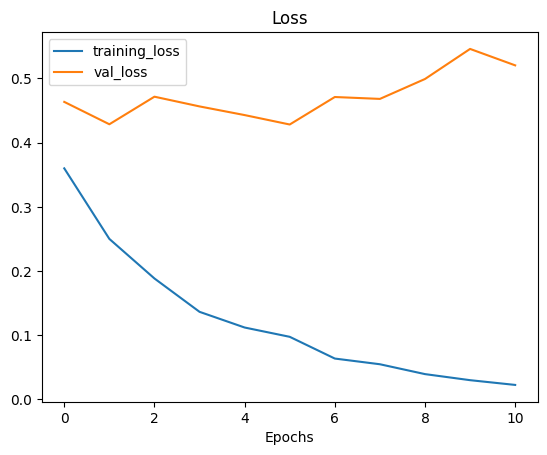

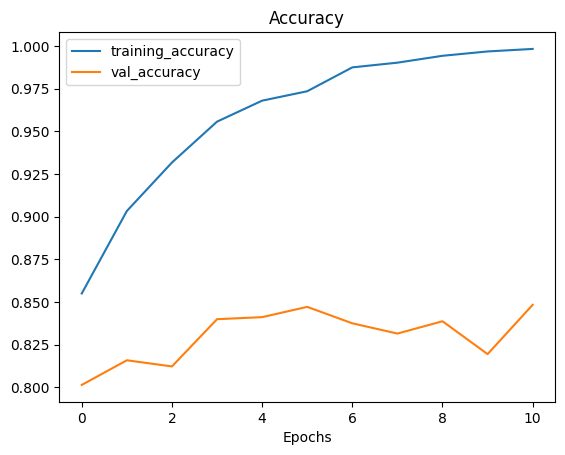

In [ ]:
plot_loss_curves(history)

# **MobileNetV3Large**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, loss, label='training_loss')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Large, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Large, preprocess_input
model = MobileNetV3Large()
model.summary()

22661472/22661472 [==============================] - 0s 0us/step
Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_2[0][0]']            
                  

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.MobileNetV3Large(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 4805      
                                                                 
Total params: 3,001,157
Trainable params: 4,805
Non-trainable params: 2,996,352
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 26s 147ms/step - loss: 0.8073 - accuracy: 0.6626 - val_loss: 0.5494 - val_accuracy: 0.7810
Epoch 2/30
148/148 [==============================] - 21s 143ms/step - loss: 0.5106 - accuracy: 0.7895 - val_loss: 0.4862 - val_accuracy: 0.7990
Epoch 3/30
148/148 [==============================] - 20s 138ms/step - loss: 0.4417 - accuracy: 0.8217 - val_loss: 0.4608 - val_accuracy: 0.8219
Epoch 4/30
148/148 [==============================] - 19s 125ms/step - loss: 0.4031 - accuracy: 0.8389 - val_loss: 0.4558 - val_accuracy: 0.8087
Epoch 5/30
148/148 [==============================] - 20s 132ms/step - loss: 0.3787 - accuracy: 0.8448 - val_loss: 0.4237 - val_accuracy: 0.8075
Epoch 6/30
148/148 [==============================] - 18s 124ms/step - loss: 0.3584 - accuracy: 0.8550 - val_loss: 0.4161 - val_accuracy: 0.8327
Epoch 7/30
148/148 [==============================] - 19s 127ms/step - loss: 0.3392 - accuracy: 0.8620 - val_loss: 0.4221 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report,confusion_matrix
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 10s 225ms/step
Model Accuracy: 86.24%
                precision    recall  f1-score   support

          Mild       0.76      0.88      0.82       222
      Moderate       0.97      0.98      0.98       201
         No_DR       0.99      0.98      0.99       361
Proliferate_DR       0.80      0.67      0.73       295
        Severe       0.78      0.82      0.80       309

      accuracy                           0.86      1388
     macro avg       0.86      0.87      0.86      1388
  weighted avg       0.86      0.86      0.86      1388



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, pred_classes)
print(cm)

[[196   0   0  13  13]
 [  1 197   3   0   0]
 [  0   6 355   0   0]
 [ 40   0   0 197  58]
 [ 20   0   0  37 252]]


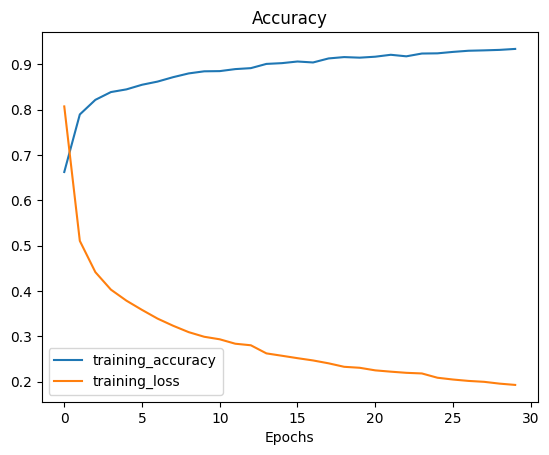

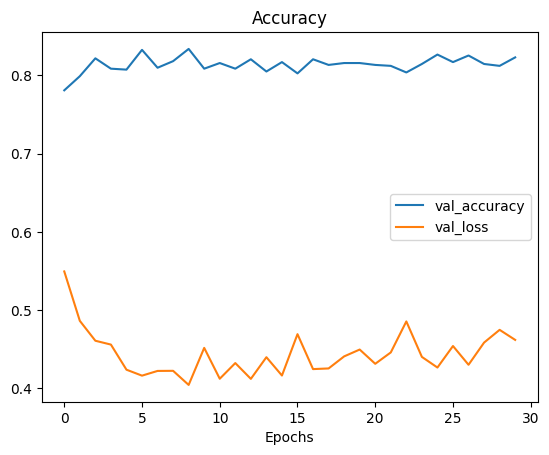

In [ ]:
plot_loss_curves(history)

In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_3 False
1 rescaling_1 False
2 Conv False
3 Conv/BatchNorm False
4 tf.__operators__.add_28 False
5 re_lu_39 False
6 tf.math.multiply_28 False
7 multiply_20 False
8 expanded_conv/depthwise False
9 expanded_conv/depthwise/BatchNorm False
10 re_lu_40 False
11 expanded_conv/project False
12 expanded_conv/project/BatchNorm False
13 expanded_conv/Add False
14 expanded_conv_1/expand False
15 expanded_conv_1/expand/BatchNorm False
16 re_lu_41 False
17 expanded_conv_1/depthwise/pad False
18 expanded_conv_1/depthwise False
19 expanded_conv_1/depthwise/BatchNorm False
20 re_lu_42 False
21 expanded_conv_1/project False
22 expanded_conv_1/project/BatchNorm False
23 expanded_conv_2/expand False
24 expanded_conv_2/expand/BatchNorm False
25 re_lu_43 False
26 expanded_conv_2/depthwise False
27 expanded_conv_2/depthwise/BatchNorm False
28 re_lu_44 False
29 expanded_conv_2/project False
30 expanded_conv_2/project/BatchNorm False
31 expanded_conv_2/Add False
32 expanded_conv_3/expand False
33 expan

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 50
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 40/50
148/148 [==============================] - 27s 180ms/step - loss: 0.1135 - accuracy: 0.9591 - val_loss: 0.7779 - val_accuracy: 0.7870
Epoch 41/50
148/148 [==============================] - 19s 125ms/step - loss: 0.0641 - accuracy: 0.9780 - val_loss: 0.7769 - val_accuracy: 0.8099
Epoch 42/50
148/148 [==============================] - 19s 131ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.8175 - val_accuracy: 0.8375
Epoch 43/50
148/148 [==============================] - 18s 123ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.6713 - val_accuracy: 0.8556
Epoch 44/50
148/148 [==============================] - 19s 125ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.7067 - val_accuracy: 0.8556
Epoch 45/50
148/148 [==============================] - 19s 126ms/step - loss: 5.6191e-04 - accuracy: 1.0000 - val_loss: 0.7283 - val_accuracy: 0.8664
Epoch 46/50
148/148 [==============================] - 19s 126ms/step - loss: 3.1898e-04 - accuracy: 1.0000 - val_loss: 

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 5s 104ms/step
Model Accuracy: 93.95%
                precision    recall  f1-score   support

          Mild       0.95      0.93      0.94       222
      Moderate       0.99      0.97      0.98       201
         No_DR       0.98      0.99      0.99       361
Proliferate_DR       0.92      0.85      0.89       295
        Severe       0.87      0.95      0.91       309

      accuracy                           0.94      1388
     macro avg       0.94      0.94      0.94      1388
  weighted avg       0.94      0.94      0.94      1388



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, pred_classes)
print(cm)

[[206   0   0   8   8]
 [  0 194   7   0   0]
 [  0   2 359   0   0]
 [  9   0   0 252  34]
 [  2   0   0  14 293]]


In [ ]:
model.save('/content/drive/MyDrive/Models/MobileNetV3Large.h5')

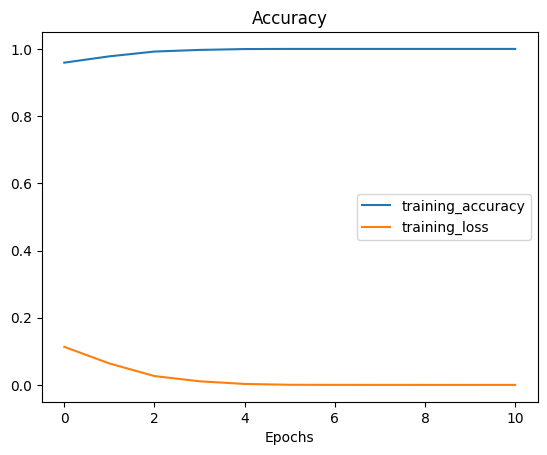

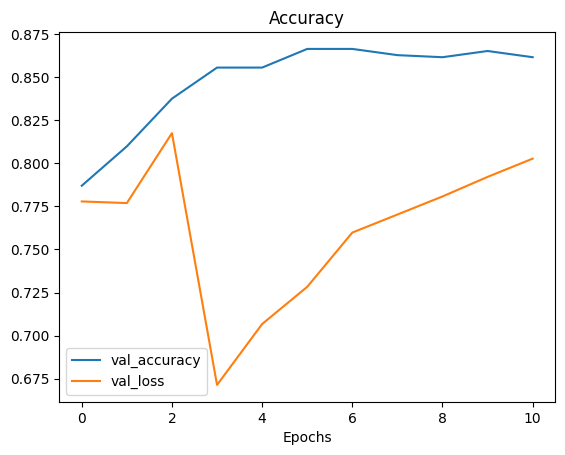

In [ ]:
plot_loss_curves(history)

# **ConvNextLarge**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, loss, label='training_loss')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.convnext import ConvNeXtLarge, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.convnext import ConvNeXtLarge, preprocess_input
model = ConvNeXtLarge()
model.summary()

791747368/791747368 [==============================] - 12s 0us/step
Model: "convnext_large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_large_prestem_normali  (None, 224, 224, 3)  0          ['input_10[0][0]']               
 zation (Normalization)                                                                           
                                                                                                  
 convnext_large_stem (Sequentia  (None, 56, 56, 192)  9792       ['convnext_large_prestem_normaliz
 l)              

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.ConvNeXtLarge(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

785596384/785596384 [==============================] - 10s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 convnext_large (Functional)  (None, 7, 7, 1536)       196230336 
                                                                 
 global_average_pooling2d_4   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 5)                 7685      
                                                                 
Total params: 196,238,021
Trainable params: 7,685
Non-trainable params: 196,230,336
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set),
                    validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 218s 1s/step - loss: 0.6543 - accuracy: 0.7215 - val_loss: 0.4937 - val_accuracy: 0.7750
Epoch 2/30
148/148 [==============================] - 177s 1s/step - loss: 0.4378 - accuracy: 0.8234 - val_loss: 0.4576 - val_accuracy: 0.8002
Epoch 3/30
148/148 [==============================] - 192s 1s/step - loss: 0.3878 - accuracy: 0.8448 - val_loss: 0.4296 - val_accuracy: 0.7990
Epoch 4/30
148/148 [==============================] - 178s 1s/step - loss: 0.3633 - accuracy: 0.8569 - val_loss: 0.4260 - val_accuracy: 0.8026
Epoch 5/30
148/148 [==============================] - 177s 1s/step - loss: 0.3400 - accuracy: 0.8669 - val_loss: 0.4072 - val_accuracy: 0.8099
Epoch 6/30
148/148 [==============================] - 178s 1s/step - loss: 0.3192 - accuracy: 0.8798 - val_loss: 0.4244 - val_accuracy: 0.8051
Epoch 7/30
148/148 [==============================] - 177s 1s/step - loss: 0.3078 - accuracy: 0.8811 - val_loss: 0.4313 - val_accuracy: 0.7942

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 53s 1s/step
Model Accuracy: 87.68%
                precision    recall  f1-score   support

          Mild       0.93      0.84      0.88       222
      Moderate       0.97      1.00      0.98       201
         No_DR       1.00      0.98      0.99       361
Proliferate_DR       0.76      0.76      0.76       295
        Severe       0.76      0.82      0.79       309

      accuracy                           0.88      1388
     macro avg       0.88      0.88      0.88      1388
  weighted avg       0.88      0.88      0.88      1388



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, pred_classes)
print(cm)

[[186   0   0  18  18]
 [  0 200   1   0   0]
 [  0   6 355   0   0]
 [ 11   0   0 224  60]
 [  3   0   0  54 252]]


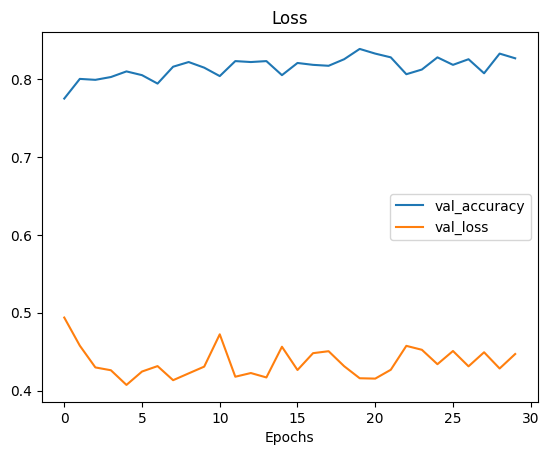

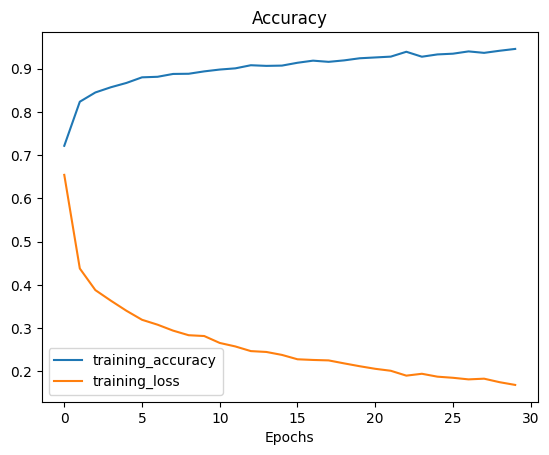

In [ ]:
plot_loss_curves(history)

In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_8 False
1 convnext_large_prestem_normalization False
2 convnext_large_stem False
3 convnext_large_stage_0_block_0_depthwise_conv False
4 convnext_large_stage_0_block_0_layernorm False
5 convnext_large_stage_0_block_0_pointwise_conv_1 False
6 convnext_large_stage_0_block_0_gelu False
7 convnext_large_stage_0_block_0_pointwise_conv_2 False
8 convnext_large_stage_0_block_0_layer_scale False
9 convnext_large_stage_0_block_0_identity False
10 tf.__operators__.add_85 False
11 convnext_large_stage_0_block_1_depthwise_conv False
12 convnext_large_stage_0_block_1_layernorm False
13 convnext_large_stage_0_block_1_pointwise_conv_1 False
14 convnext_large_stage_0_block_1_gelu False
15 convnext_large_stage_0_block_1_pointwise_conv_2 False
16 convnext_large_stage_0_block_1_layer_scale False
17 convnext_large_stage_0_block_1_identity False
18 tf.__operators__.add_86 False
19 convnext_large_stage_0_block_2_depthwise_conv False
20 convnext_large_stage_0_block_2_layernorm False
21 convnext_large

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 50
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/50
148/148 [==============================] - 223s 1s/step - loss: 0.5217 - accuracy: 0.8654 - val_loss: 0.4171 - val_accuracy: 0.8291
Epoch 31/50
148/148 [==============================] - 217s 1s/step - loss: 0.1792 - accuracy: 0.9356 - val_loss: 0.4566 - val_accuracy: 0.8363
Epoch 32/50
148/148 [==============================] - 196s 1s/step - loss: 0.1276 - accuracy: 0.9536 - val_loss: 0.4737 - val_accuracy: 0.8496
Epoch 33/50
148/148 [==============================] - 184s 1s/step - loss: 0.0767 - accuracy: 0.9754 - val_loss: 0.5731 - val_accuracy: 0.8291
Epoch 34/50
148/148 [==============================] - 184s 1s/step - loss: 0.0443 - accuracy: 0.9881 - val_loss: 0.6188 - val_accuracy: 0.8375
Epoch 35/50
148/148 [==============================] - 184s 1s/step - loss: 0.0481 - accuracy: 0.9864 - val_loss: 0.6192 - val_accuracy: 0.8436
Epoch 36/50
148/148 [==============================] - 184s 1s/step - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.7113 - val_accuracy:

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 47s 997ms/step
Model Accuracy: 93.37%
                precision    recall  f1-score   support

          Mild       0.92      0.95      0.93       222
      Moderate       0.98      0.99      0.98       201
         No_DR       0.99      0.98      0.99       361
Proliferate_DR       0.88      0.85      0.87       295
        Severe       0.89      0.91      0.90       309

      accuracy                           0.93      1388
     macro avg       0.93      0.94      0.93      1388
  weighted avg       0.93      0.93      0.93      1388



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, pred_classes)
print(cm)

[[210   0   0   9   3]
 [  0 199   2   0   0]
 [  0   5 355   0   1]
 [ 15   0   0 251  29]
 [  3   0   0  25 281]]


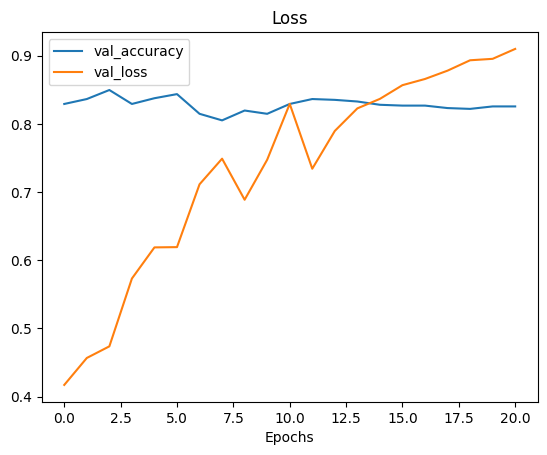

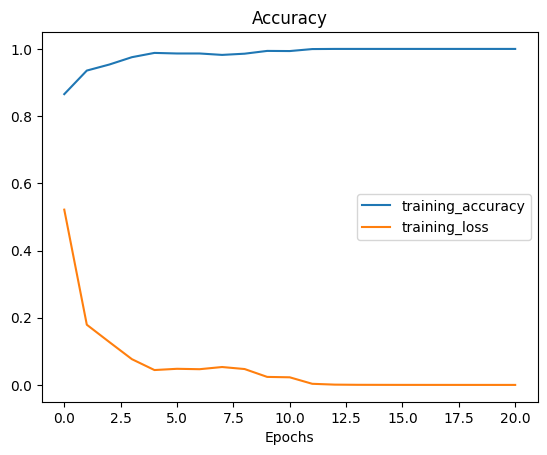

In [ ]:
plot_loss_curves(history)

In [ ]:
model.save('/content/drive/MyDrive/Models/ConvNextLarge.hdf5')

In [ ]:
!pip install pickle-mixin
import pickle
pickle.dump(model, open('model.pkl','wb') )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6006 sha256=5a58ae73683cbc0279e893d0ae57d09bb83b450c5c69248417ecb0ab326e16fa
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


# **ConvNextBase**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.convnext import ConvNeXtBase, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.ConvNeXtBase(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

350926856/350926856 [==============================] - 4s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 convnext_base (Functional)  (None, 7, 7, 1024)        87566464  
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 87,571,589
Trainable params: 5,125
Non-trainable params: 87,566,464
_________________________________________________________________


In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30


Copying files: 15 files [48:06, 192.41s/ files]


148/148 [==============================] - 144s 815ms/step - loss: 0.7158 - accuracy: 0.7052 - val_loss: 0.5321 - val_accuracy: 0.7617
Epoch 2/30
148/148 [==============================] - 101s 683ms/step - loss: 0.4817 - accuracy: 0.8001 - val_loss: 0.4392 - val_accuracy: 0.8171
Epoch 3/30
148/148 [==============================] - 101s 681ms/step - loss: 0.4217 - accuracy: 0.8343 - val_loss: 0.4327 - val_accuracy: 0.8207
Epoch 4/30
148/148 [==============================] - 101s 683ms/step - loss: 0.3920 - accuracy: 0.8442 - val_loss: 0.3999 - val_accuracy: 0.8267
Epoch 5/30
148/148 [==============================] - 106s 720ms/step - loss: 0.3679 - accuracy: 0.8506 - val_loss: 0.3942 - val_accuracy: 0.8315
Epoch 6/30
148/148 [==============================] - 101s 681ms/step - loss: 0.3493 - accuracy: 0.8641 - val_loss: 0.3961 - val_accuracy: 0.8327
Epoch 7/30
148/148 [==============================] - 106s 719ms/step - loss: 0.3363 - accuracy: 0.8749 - val_loss: 0.3819 - val_accura

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 33s 660ms/step
Model Accuracy: 87.25%
                precision    recall  f1-score   support

          Mild       0.94      0.80      0.86       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.99       361
Proliferate_DR       0.76      0.74      0.75       295
        Severe       0.75      0.85      0.80       309

      accuracy                           0.87      1388
     macro avg       0.88      0.87      0.87      1388
  weighted avg       0.88      0.87      0.87      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_5 False
1 convnext_base_prestem_normalization False
2 convnext_base_stem False
3 convnext_base_stage_0_block_0_depthwise_conv False
4 convnext_base_stage_0_block_0_layernorm False
5 convnext_base_stage_0_block_0_pointwise_conv_1 False
6 convnext_base_stage_0_block_0_gelu False
7 convnext_base_stage_0_block_0_pointwise_conv_2 False
8 convnext_base_stage_0_block_0_layer_scale False
9 convnext_base_stage_0_block_0_identity False
10 tf.__operators__.add_28 False
11 convnext_base_stage_0_block_1_depthwise_conv False
12 convnext_base_stage_0_block_1_layernorm False
13 convnext_base_stage_0_block_1_pointwise_conv_1 False
14 convnext_base_stage_0_block_1_gelu False
15 convnext_base_stage_0_block_1_pointwise_conv_2 False
16 convnext_base_stage_0_block_1_layer_scale False
17 convnext_base_stage_0_block_1_identity False
18 tf.__operators__.add_29 False
19 convnext_base_stage_0_block_2_depthwise_conv False
20 convnext_base_stage_0_block_2_layernorm False
21 convnext_base_stage_0_block_2_po

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 133s 757ms/step - loss: 0.5663 - accuracy: 0.8370 - val_loss: 0.4041 - val_accuracy: 0.8508
Epoch 31/40
148/148 [==============================] - 104s 704ms/step - loss: 0.1984 - accuracy: 0.9235 - val_loss: 0.4830 - val_accuracy: 0.8339
Epoch 32/40
148/148 [==============================] - 104s 705ms/step - loss: 0.1230 - accuracy: 0.9574 - val_loss: 0.5207 - val_accuracy: 0.8327
Epoch 33/40
148/148 [==============================] - 110s 743ms/step - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.5398 - val_accuracy: 0.8279
Epoch 34/40
148/148 [==============================] - 104s 705ms/step - loss: 0.0462 - accuracy: 0.9877 - val_loss: 0.6130 - val_accuracy: 0.8267
Epoch 35/40
148/148 [==============================] - 104s 705ms/step - loss: 0.0345 - accuracy: 0.9919 - val_loss: 0.6072 - val_accuracy: 0.8424
Epoch 36/40
148/148 [==============================] - 104s 704ms/step - loss: 0.0190 - accuracy: 0.9964 - val_loss: 0

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 31s 566ms/step
Model Accuracy: 92.29%
                precision    recall  f1-score   support

          Mild       0.91      0.95      0.93       222
      Moderate       0.97      0.98      0.97       201
         No_DR       0.99      0.98      0.98       361
Proliferate_DR       0.92      0.77      0.84       295
        Severe       0.85      0.94      0.89       309

      accuracy                           0.92      1388
     macro avg       0.92      0.93      0.92      1388
  weighted avg       0.92      0.92      0.92      1388



In [ ]:
model.save('/content/drive/MyDrive/Models/ConvNextBase.h5')

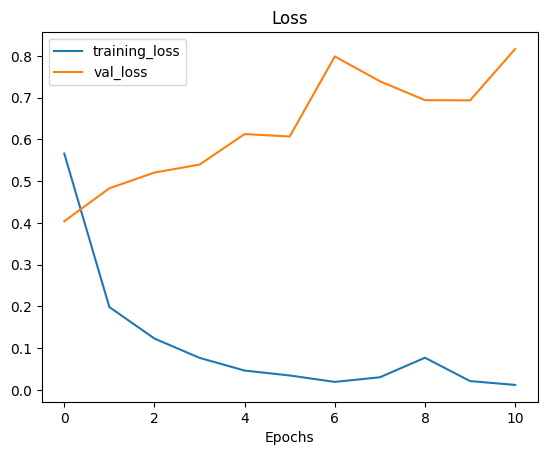

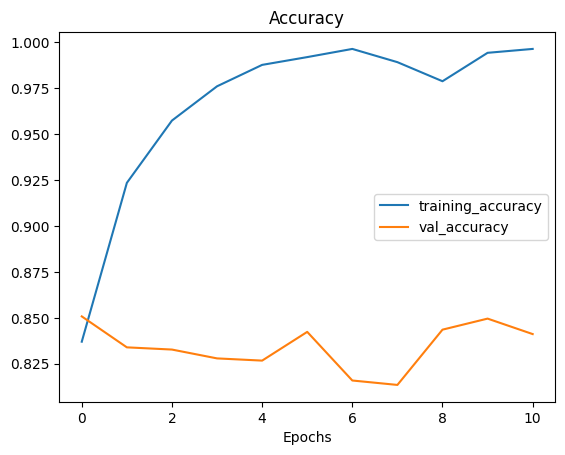

In [ ]:
plot_loss_curves(history)

# **EfficinetNetV2B0**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetV2B0(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

24274472/24274472 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 5,925,717
Trainable params: 6,405
Non-trainable params: 5,919,312
________________________________________________

In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 49s 216ms/step - loss: 0.7996 - accuracy: 0.6838 - val_loss: 0.5746 - val_accuracy: 0.7798
Epoch 2/30
148/148 [==============================] - 20s 137ms/step - loss: 0.5193 - accuracy: 0.7908 - val_loss: 0.4912 - val_accuracy: 0.8075
Epoch 3/30
148/148 [==============================] - 21s 144ms/step - loss: 0.4565 - accuracy: 0.8169 - val_loss: 0.4632 - val_accuracy: 0.8147
Epoch 4/30
148/148 [==============================] - 21s 142ms/step - loss: 0.4220 - accuracy: 0.8345 - val_loss: 0.4490 - val_accuracy: 0.8291
Epoch 5/30
148/148 [==============================] - 21s 145ms/step - loss: 0.3992 - accuracy: 0.8396 - val_loss: 0.4296 - val_accuracy: 0.8339
Epoch 6/30
148/148 [==============================] - 22s 150ms/step - loss: 0.3778 - accuracy: 0.8527 - val_loss: 0.4272 - val_accuracy: 0.8279
Epoch 7/30
148/148 [==============================] - 21s 143ms/step - loss: 0.3620 - accuracy: 0.8612 - val_loss: 0.4280 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 8s 137ms/step
Model Accuracy: 87.25%
                precision    recall  f1-score   support

          Mild       0.89      0.77      0.82       222
      Moderate       0.99      0.99      0.99       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.82      0.64      0.72       295
        Severe       0.73      0.95      0.83       309

      accuracy                           0.87      1388
     macro avg       0.88      0.87      0.87      1388
  weighted avg       0.88      0.87      0.87      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 50
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 40/50
148/148 [==============================] - 25s 165ms/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.7298 - val_accuracy: 0.8351
Epoch 41/50
148/148 [==============================] - 20s 134ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.8391 - val_accuracy: 0.8351
Epoch 42/50
148/148 [==============================] - 20s 133ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.8454 - val_accuracy: 0.8315
Epoch 43/50
148/148 [==============================] - 20s 133ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.7306 - val_accuracy: 0.8267
Epoch 44/50
148/148 [==============================] - 19s 129ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.7620 - val_accuracy: 0.8412
Epoch 45/50
148/148 [==============================] - 20s 133ms/step - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.7847 - val_accuracy: 0.8424
Epoch 46/50
148/148 [==============================] - 31s 212ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8459 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 5s 103ms/step
Model Accuracy: 93.37%
                precision    recall  f1-score   support

          Mild       0.91      0.92      0.92       222
      Moderate       0.98      0.99      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.89      0.83      0.86       295
        Severe       0.89      0.94      0.92       309

      accuracy                           0.93      1388
     macro avg       0.93      0.93      0.93      1388
  weighted avg       0.93      0.93      0.93      1388



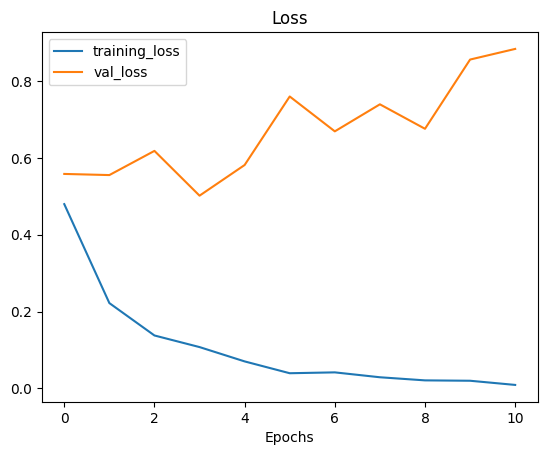

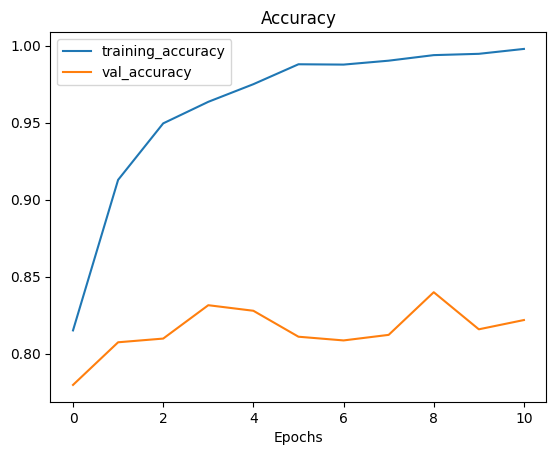

In [ ]:
plot_loss_curves(history)

# **EfficientNetV2b1**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B1, preprocess_input
IMAGE_SHAPE = (240, 240)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(240,240),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(240,240),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(240,240),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetV2B1(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(240,240, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

28456008/28456008 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 efficientnetv2-b1 (Function  (None, 8, 8, 1280)       6931124   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 6,937,529
Trainable params: 6,405
Non-trainable params: 6,931,124
________________________________________________

In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 45s 175ms/step - loss: 0.7968 - accuracy: 0.6804 - val_loss: 0.5950 - val_accuracy: 0.7677
Epoch 2/30
148/148 [==============================] - 23s 158ms/step - loss: 0.5286 - accuracy: 0.7834 - val_loss: 0.5109 - val_accuracy: 0.7882
Epoch 3/30
148/148 [==============================] - 22s 150ms/step - loss: 0.4701 - accuracy: 0.8122 - val_loss: 0.4795 - val_accuracy: 0.8051
Epoch 4/30
148/148 [==============================] - 21s 143ms/step - loss: 0.4408 - accuracy: 0.8194 - val_loss: 0.4618 - val_accuracy: 0.8087
Epoch 5/30
148/148 [==============================] - 24s 160ms/step - loss: 0.4120 - accuracy: 0.8355 - val_loss: 0.4573 - val_accuracy: 0.8135
Epoch 6/30
148/148 [==============================] - 24s 159ms/step - loss: 0.3936 - accuracy: 0.8434 - val_loss: 0.4429 - val_accuracy: 0.8279
Epoch 7/30
148/148 [==============================] - 23s 153ms/step - loss: 0.3816 - accuracy: 0.8510 - val_loss: 0.4456 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 8s 138ms/step
Model Accuracy: 86.02%
                precision    recall  f1-score   support

          Mild       0.89      0.73      0.80       222
      Moderate       0.98      0.99      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.69      0.80      0.74       295
        Severe       0.80      0.78      0.79       309

      accuracy                           0.86      1388
     macro avg       0.87      0.86      0.86      1388
  weighted avg       0.87      0.86      0.86      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
37 bl

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 39s 182ms/step - loss: 0.4141 - accuracy: 0.8383 - val_loss: 0.4019 - val_accuracy: 0.8496
Epoch 31/40
148/148 [==============================] - 22s 151ms/step - loss: 0.2469 - accuracy: 0.9004 - val_loss: 0.4519 - val_accuracy: 0.8387
Epoch 32/40
148/148 [==============================] - 22s 148ms/step - loss: 0.1767 - accuracy: 0.9377 - val_loss: 0.5153 - val_accuracy: 0.8255
Epoch 33/40
148/148 [==============================] - 23s 154ms/step - loss: 0.1195 - accuracy: 0.9604 - val_loss: 0.4298 - val_accuracy: 0.8508
Epoch 34/40
148/148 [==============================] - 21s 139ms/step - loss: 0.0913 - accuracy: 0.9684 - val_loss: 0.6643 - val_accuracy: 0.8014
Epoch 35/40
148/148 [==============================] - 24s 165ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.4715 - val_accuracy: 0.8520
Epoch 36/40
148/148 [==============================] - 22s 147ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.7292 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 8s 129ms/step
Model Accuracy: 91.43%
                precision    recall  f1-score   support

          Mild       0.88      0.89      0.88       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.98      0.98       361
Proliferate_DR       0.89      0.78      0.83       295
        Severe       0.85      0.94      0.89       309

      accuracy                           0.91      1388
     macro avg       0.91      0.91      0.91      1388
  weighted avg       0.92      0.91      0.91      1388



In [ ]:
model.save('EffV2b1.h5')

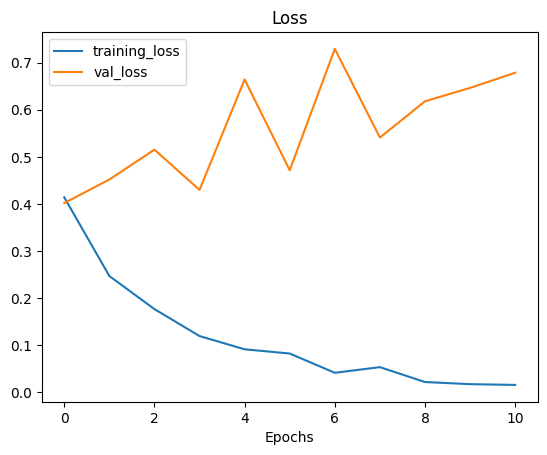

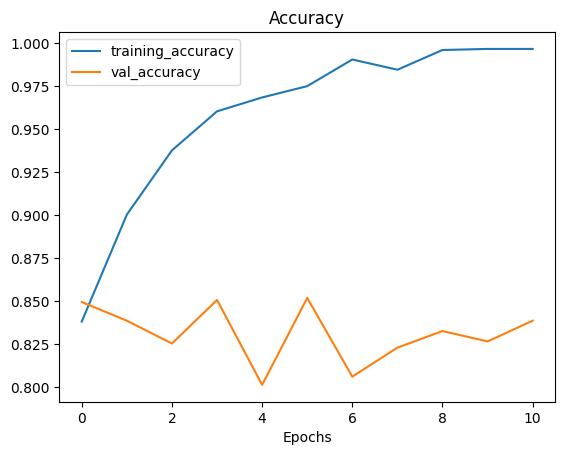

In [ ]:
plot_loss_curves(history)

# **EfficientNetV2B2**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B2, preprocess_input
IMAGE_SHAPE = (260, 260)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260,260),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(260,260),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(260,260),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetV2B2(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(260,260, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

35839040/35839040 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 9, 9, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 7045      
                                                                 
Total params: 8,776,419
Trainable params: 7,045
Non-trainable params: 8,769,374
______________________________________________

In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 39s 184ms/step - loss: 0.7872 - accuracy: 0.6967 - val_loss: 0.5685 - val_accuracy: 0.7870
Epoch 2/30
148/148 [==============================] - 24s 164ms/step - loss: 0.5403 - accuracy: 0.7847 - val_loss: 0.4935 - val_accuracy: 0.8039
Epoch 3/30
148/148 [==============================] - 22s 150ms/step - loss: 0.4780 - accuracy: 0.8097 - val_loss: 0.4557 - val_accuracy: 0.8231
Epoch 4/30
148/148 [==============================] - 27s 182ms/step - loss: 0.4448 - accuracy: 0.8243 - val_loss: 0.4420 - val_accuracy: 0.8243
Epoch 5/30
148/148 [==============================] - 24s 163ms/step - loss: 0.4180 - accuracy: 0.8393 - val_loss: 0.4317 - val_accuracy: 0.8219
Epoch 6/30
148/148 [==============================] - 23s 154ms/step - loss: 0.3970 - accuracy: 0.8434 - val_loss: 0.4170 - val_accuracy: 0.8327
Epoch 7/30
148/148 [==============================] - 22s 150ms/step - loss: 0.3796 - accuracy: 0.8527 - val_loss: 0.4404 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 9s 142ms/step
Model Accuracy: 85.81%
                precision    recall  f1-score   support

          Mild       0.84      0.83      0.83       222
      Moderate       0.96      0.99      0.97       201
         No_DR       0.99      0.98      0.98       361
Proliferate_DR       0.73      0.71      0.72       295
        Severe       0.77      0.80      0.78       309

      accuracy                           0.86      1388
     macro avg       0.86      0.86      0.86      1388
  weighted avg       0.86      0.86      0.86      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_3 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
3

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 57s 238ms/step - loss: 0.4645 - accuracy: 0.8277 - val_loss: 0.4434 - val_accuracy: 0.8424
Epoch 31/40
148/148 [==============================] - 25s 166ms/step - loss: 0.2394 - accuracy: 0.9089 - val_loss: 0.5160 - val_accuracy: 0.8051
Epoch 32/40
148/148 [==============================] - 26s 176ms/step - loss: 0.1943 - accuracy: 0.9252 - val_loss: 0.4186 - val_accuracy: 0.8592
Epoch 33/40
148/148 [==============================] - 23s 156ms/step - loss: 0.1267 - accuracy: 0.9555 - val_loss: 0.4648 - val_accuracy: 0.8412
Epoch 34/40
148/148 [==============================] - 25s 165ms/step - loss: 0.0967 - accuracy: 0.9652 - val_loss: 0.4868 - val_accuracy: 0.8484
Epoch 35/40
148/148 [==============================] - 22s 149ms/step - loss: 0.0525 - accuracy: 0.9881 - val_loss: 0.5437 - val_accuracy: 0.8448
Epoch 36/40
148/148 [==============================] - 24s 161ms/step - loss: 0.0408 - accuracy: 0.9903 - val_loss: 0.5652 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 7s 121ms/step
Model Accuracy: 91.43%
                precision    recall  f1-score   support

          Mild       0.88      0.88      0.88       222
      Moderate       0.98      0.97      0.97       201
         No_DR       0.98      0.99      0.99       361
Proliferate_DR       0.88      0.83      0.85       295
        Severe       0.85      0.89      0.87       309

      accuracy                           0.91      1388
     macro avg       0.91      0.91      0.91      1388
  weighted avg       0.91      0.91      0.91      1388



In [ ]:
model.save('EffV2B2.h5')

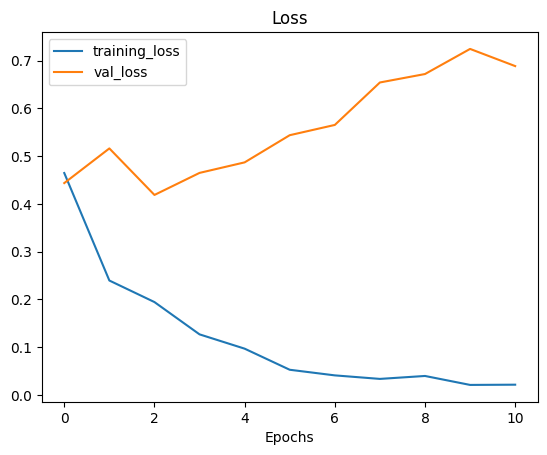

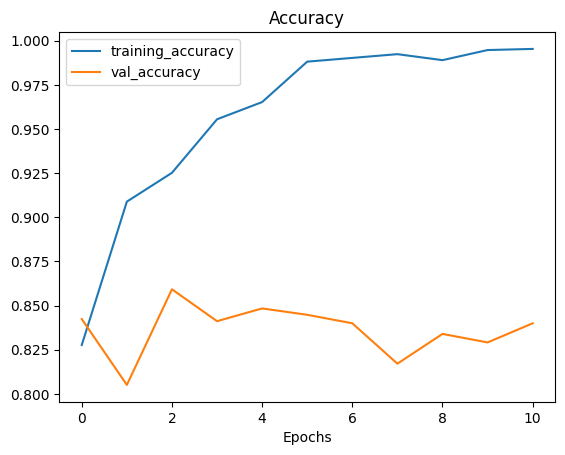

In [ ]:
plot_loss_curves(history)

# **EfficientNetV3b3**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B3, preprocess_input
IMAGE_SHAPE = (300, 300)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(300,300),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(300,300),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(300,300),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetV2B3(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(224,224, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

52606240/52606240 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, 10, 10, 1536)     12930622  
 al)                                                             
                                                                 
 global_average_pooling2d_2   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 7685      
                                                                 
Total params: 12,938,307
Trainable params: 7,685
Non-trainable params: 12,930,622
____________________________________________

In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 49s 240ms/step - loss: 0.8024 - accuracy: 0.6808 - val_loss: 0.5617 - val_accuracy: 0.7822
Epoch 2/30
148/148 [==============================] - 31s 210ms/step - loss: 0.5130 - accuracy: 0.7972 - val_loss: 0.4761 - val_accuracy: 0.8111
Epoch 3/30
148/148 [==============================] - 32s 213ms/step - loss: 0.4537 - accuracy: 0.8203 - val_loss: 0.4567 - val_accuracy: 0.7978
Epoch 4/30
148/148 [==============================] - 32s 214ms/step - loss: 0.4173 - accuracy: 0.8311 - val_loss: 0.4347 - val_accuracy: 0.8351
Epoch 5/30
148/148 [==============================] - 31s 208ms/step - loss: 0.3949 - accuracy: 0.8489 - val_loss: 0.4200 - val_accuracy: 0.8267
Epoch 6/30
148/148 [==============================] - 31s 209ms/step - loss: 0.3701 - accuracy: 0.8552 - val_loss: 0.4044 - val_accuracy: 0.8363
Epoch 7/30
148/148 [==============================] - 30s 205ms/step - loss: 0.3611 - accuracy: 0.8567 - val_loss: 0.4338 - val_ac

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 12s 213ms/step
Model Accuracy: 87.18%
                precision    recall  f1-score   support

          Mild       0.79      0.87      0.83       222
      Moderate       0.98      0.98      0.98       201
         No_DR       0.99      0.99      0.99       361
Proliferate_DR       0.79      0.69      0.74       295
        Severe       0.80      0.84      0.82       309

      accuracy                           0.87      1388
     macro avg       0.87      0.87      0.87      1388
  weighted avg       0.87      0.87      0.87      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
3

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/40
148/148 [==============================] - 69s 307ms/step - loss: 0.5337 - accuracy: 0.8234 - val_loss: 0.4969 - val_accuracy: 0.8159
Epoch 31/40
148/148 [==============================] - 32s 218ms/step - loss: 0.2388 - accuracy: 0.9057 - val_loss: 0.5840 - val_accuracy: 0.7665
Epoch 32/40
148/148 [==============================] - 34s 228ms/step - loss: 0.1572 - accuracy: 0.9432 - val_loss: 0.4630 - val_accuracy: 0.8279
Epoch 33/40
148/148 [==============================] - 34s 229ms/step - loss: 0.1029 - accuracy: 0.9635 - val_loss: 0.4834 - val_accuracy: 0.8387
Epoch 34/40
148/148 [==============================] - 33s 223ms/step - loss: 0.0668 - accuracy: 0.9813 - val_loss: 0.4811 - val_accuracy: 0.8580
Epoch 35/40
148/148 [==============================] - 33s 223ms/step - loss: 0.0348 - accuracy: 0.9928 - val_loss: 0.5512 - val_accuracy: 0.8327
Epoch 36/40
148/148 [==============================] - 31s 211ms/step - loss: 0.0242 - accuracy: 0.9953 - val_loss: 0.5790 -

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 10s 179ms/step
Model Accuracy: 91.86%
                precision    recall  f1-score   support

          Mild       0.93      0.85      0.89       222
      Moderate       0.94      0.99      0.96       201
         No_DR       0.99      0.97      0.98       361
Proliferate_DR       0.86      0.83      0.85       295
        Severe       0.87      0.95      0.91       309

      accuracy                           0.92      1388
     macro avg       0.92      0.92      0.92      1388
  weighted avg       0.92      0.92      0.92      1388



In [ ]:
model.save('EffV2B3.h5')

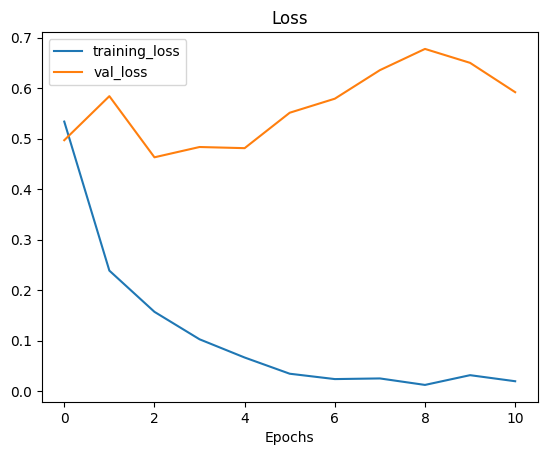

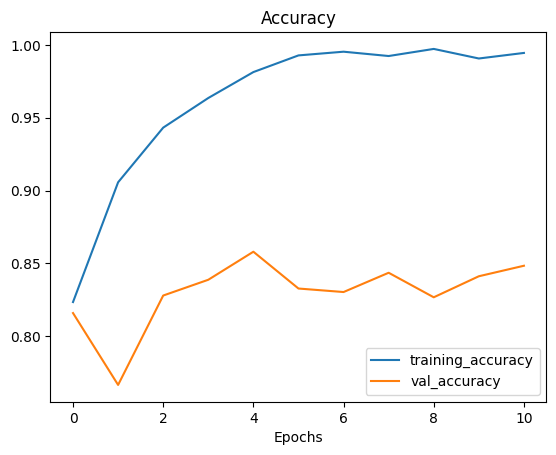

In [ ]:
plot_loss_curves(history)

# **EfficientNetV2L**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from glob import glob

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L, preprocess_input
IMAGE_SHAPE = (480, 480)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/k/train"
test_dir = "/content/drive/MyDrive/k/val"


train_datagen = ImageDataGenerator(validation_split = 0.15,preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(480,480),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='training',
                                              class_mode = 'categorical')
valid_set=train_datagen.flow_from_directory(train_dir,
                                              target_size=(480,480),
                                              batch_size=32,
                                              shuffle=True,seed=42,subset='validation',
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(480,480),
                                            batch_size=32,
                                            class_mode='categorical',shuffle=False,seed=42)

Found 4718 images belonging to 5 classes.
Found 831 images belonging to 5 classes.
Found 1388 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create model
feature_extractor_layer = keras.applications.EfficientNetV2L(weights='imagenet', include_top=False,
                                                               input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

feature_extractor_layer.trainable = False # freeze the underlying patterns
# Create our own model
inputs = keras.Input(shape=(480,480, 3))
x = feature_extractor_layer(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
#model summary
model.summary()

473176280/473176280 [==============================] - 16s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 480, 480, 3)]     0         
                                                                 
 efficientnetv2-l (Functiona  (None, 15, 15, 1280)     117746848 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 117,753,253
Trainable params: 6,405
Non-trainable params: 117,746,848
_________________________________________

In [ ]:
model.layers
for layer in model.layers:
  print(layer.trainable)

True
False
True
True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# define the checkpoint filepath
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.h5'

# create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(valid_set))

Epoch 1/30
148/148 [==============================] - 335s 2s/step - loss: 0.8380 - accuracy: 0.6770 - val_loss: 0.6337 - val_accuracy: 0.7569
Epoch 2/30
148/148 [==============================] - 284s 2s/step - loss: 0.5846 - accuracy: 0.7734 - val_loss: 0.5620 - val_accuracy: 0.7605
Epoch 3/30
148/148 [==============================] - 283s 2s/step - loss: 0.5204 - accuracy: 0.7950 - val_loss: 0.5326 - val_accuracy: 0.7882
Epoch 4/30
148/148 [==============================] - 283s 2s/step - loss: 0.4865 - accuracy: 0.8090 - val_loss: 0.5044 - val_accuracy: 0.8026
Epoch 5/30
148/148 [==============================] - 284s 2s/step - loss: 0.4654 - accuracy: 0.8194 - val_loss: 0.4869 - val_accuracy: 0.7990
Epoch 6/30
148/148 [==============================] - 289s 2s/step - loss: 0.4418 - accuracy: 0.8323 - val_loss: 0.4845 - val_accuracy: 0.7954
Epoch 7/30
148/148 [==============================] - 289s 2s/step - loss: 0.4251 - accuracy: 0.8364 - val_loss: 0.4713 - val_accuracy: 0.8014

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

44/44 [==============================] - 80s 2s/step
Model Accuracy: 83.86%
                precision    recall  f1-score   support

          Mild       0.79      0.85      0.82       222
      Moderate       0.95      0.99      0.97       201
         No_DR       0.99      0.98      0.98       361
Proliferate_DR       0.68      0.67      0.67       295
        Severe       0.77      0.74      0.75       309

      accuracy                           0.84      1388
     macro avg       0.84      0.84      0.84      1388
  weighted avg       0.84      0.84      0.84      1388



In [ ]:
#unfreeze the top 10 layers
feature_extractor_layer.trainable = True

# Freeze all layers except for the 10 layers
for layer in feature_extractor_layer.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(feature_extractor_layer.layers):
  print(layer_number, layer.name, layer.trainable)
print(len(model.trainable_variables))
model.summary()

0 input_1 False
1 rescaling False
2 stem_conv False
3 stem_bn False
4 stem_activation False
5 block1a_project_conv False
6 block1a_project_bn False
7 block1a_project_activation False
8 block1a_add False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block1c_project_conv False
15 block1c_project_bn False
16 block1c_project_activation False
17 block1c_drop False
18 block1c_add False
19 block1d_project_conv False
20 block1d_project_bn False
21 block1d_project_activation False
22 block1d_drop False
23 block1d_add False
24 block2a_expand_conv False
25 block2a_expand_bn False
26 block2a_expand_activation False
27 block2a_project_conv False
28 block2a_project_bn False
29 block2b_expand_conv False
30 block2b_expand_bn False
31 block2b_expand_activation False
32 block2b_project_conv False
33 block2b_project_bn False
34 block2b_drop False
35 block2b_add False
36 block2c_expand_conv False
37 block2c_expand

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 40
# Train model
history = model.fit(train_set, validation_data=valid_set, epochs=fine_tune_epochs,
                    initial_epoch=history.epoch[-1], # start from previous last epoch
                    steps_per_epoch=len(train_set), validation_steps=len(valid_set),callbacks=[checkpoint_callback])

Epoch 30/50
148/148 [==============================] - 331s 2s/step - loss: 0.7370 - accuracy: 0.7524 - val_loss: 0.4767 - val_accuracy: 0.8135
Epoch 31/50
148/148 [==============================] - 299s 2s/step - loss: 0.3264 - accuracy: 0.8639 - val_loss: 0.4799 - val_accuracy: 0.8231
Epoch 32/50
148/148 [==============================] - 301s 2s/step - loss: 0.2486 - accuracy: 0.9044 - val_loss: 0.5262 - val_accuracy: 0.8279
Epoch 33/50
148/148 [==============================] - 300s 2s/step - loss: 0.1895 - accuracy: 0.9279 - val_loss: 0.4983 - val_accuracy: 0.8291
Epoch 34/50
148/148 [==============================] - 294s 2s/step - loss: 0.1456 - accuracy: 0.9500 - val_loss: 0.5885 - val_accuracy: 0.8147
Epoch 35/50
148/148 [==============================] - 300s 2s/step - loss: 0.1107 - accuracy: 0.9610 - val_loss: 0.5119 - val_accuracy: 0.8387
Epoch 36/50
148/148 [==============================] - 294s 2s/step - loss: 0.0670 - accuracy: 0.9769 - val_loss: 0.6444 - val_accuracy:

In [ ]:
# Generate predictions
#model.load_weights('/content/drive/MyDrive/model_checkpoint.h5') # initialize the best trained weights

true_classes = test_set.classes
class_indices = train_set.class_indices

# Invert the class indices so we can map the predictions to class names
class_indices = dict((v,k) for k,v in class_indices.items())

# Generate the predictions
preds = model.predict(test_set)
pred_classes = np.argmax(preds, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(true_classes, pred_classes)
print("Model Accuracy: {:.2f}%".format(acc * 100))

# Generate the classification report
from sklearn.metrics import classification_report
target_names = list(class_indices.values())
print(classification_report(true_classes, pred_classes, target_names=target_names))

In [ ]:
plot_loss_curves(history)

# **Ensemble Learning**

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Models/MobileNetV3Large.h5')
model2 = load_model('/content/drive/MyDrive/Models/ConvNextBase.h5')

models = [model1, model2]

preds = [model.predict(test_set) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict_classes(test_set)
prediction2 = model2.predict_classes(test_set)


accuracy1 = accuracy_score(test_set, prediction1)
accuracy2 = accuracy_score(test_set, prediction2)
ensemble_accuracy = accuracy_score(test_set, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

ValueError: ignored